# Projet 3 - Concevez une application au service de la santé publique : Notebook exploration

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
  - 1.3. [Objectif du Notebook](#toc1_3_)    
- 2. [Installation des librairies](#toc2_)    
- 3. [Imporation des données](#toc3_)    
- 4. [Listes de travail](#toc4_)    
- 5. [Réduction dimensionelle du dataset (ACP)](#toc5_)    
- 6. [Visualisation des valeurs pour le score santé](#toc6_)    
  - 6.1. [Répartition des valeurs d'additifs](#toc6_1_)    
  - 6.2. [Répartition des valeurs energy](#toc6_2_)    
  - 6.3. [Répartition des autres valeurs nutritionnelles](#toc6_3_)    
- 7. [Création du score](#toc7_)    
  - 7.1. [Score environnement](#toc7_1_)    
    - 7.1.1. [Création des sous_notes](#toc7_1_1_)    
      - 7.1.1.1. [Note packaging](#toc7_1_1_1_)    
      - 7.1.1.2. [Note produits issus de l'huile de palme](#toc7_1_1_2_)    
      - 7.1.1.3. [Note label](#toc7_1_1_3_)    
    - 7.1.2. [Création de la note environnement](#toc7_1_2_)    
    - 7.1.3. [Visualisation](#toc7_1_3_)    
    - 7.1.4. [Création du score environnement](#toc7_1_4_)    
  - 7.2. [Score santé](#toc7_2_)    
    - 7.2.1. [Création des sous_notes](#toc7_2_1_)    
      - 7.2.1.1. [Note additifs](#toc7_2_1_1_)    
      - 7.2.1.2. [Note nutritionnelle](#toc7_2_1_2_)    
    - 7.2.2. [Création de la note sante](#toc7_2_2_)    
    - 7.2.3. [Visualisation](#toc7_2_3_)    
    - 7.2.4. [Création du score sante](#toc7_2_4_)    
  - 7.3. [Score produits](#toc7_3_)    
    - 7.3.1. [Note totale](#toc7_3_1_)    
    - 7.3.2. [Score total](#toc7_3_2_)    
  - 7.4. [Visualisation des scores](#toc7_4_)    
- 8. [Corrélation entre les variables](#toc8_)    
  - 8.1. [Nutrition-score vs score nutritionnelle](#toc8_1_)    
  - 8.2. [Valeurs de la note santé vs note santé](#toc8_2_)    
    - 8.2.1. [Matrice de corrélation sur l'ensemble des valeurs de la note santé](#toc8_2_1_)    
    - 8.2.2. [Regression linéaire avec les variables les plus impactantes](#toc8_2_2_)    
    - 8.2.3. [Analyse de regression de chaque variable par rapport à la note santé](#toc8_2_3_)    
  - 8.3. [Valeurs environnementales vs note environnementale](#toc8_3_)    
    - 8.3.1. [Matrice de corrélation sur l'ensemble des variables environnementales](#toc8_3_1_)    
    - 8.3.2. [Regression linéaire avec les valeurs environnementales les plus impactantes](#toc8_3_2_)    
    - 8.3.3. [Analyse de regression de chaque variable par rapport à la note environnement](#toc8_3_3_)    
  - 8.4. [Impact de la catégorie du produit sur les notes](#toc8_4_)    
    - 8.4.1. [Estimation de l'impact par régression linéaire](#toc8_4_1_)    
    - 8.4.2. [Impact des catégories selon les notes calculées](#toc8_4_2_)    
- 9. [Mise en place d'un idée d'application](#toc9_)    
  - 9.1. [Prédiction des catégories unknown](#toc9_1_)    
    - 9.1.1. [Prédiction des pnns_groups_1](#toc9_1_1_)    
    - 9.1.2. [Prédiction des pnns_groups_2](#toc9_1_2_)    
    - 9.1.3. [Regroupement dans data](#toc9_1_3_)    
  - 9.2. [Test de la fonction better_product](#toc9_2_)    
  - 9.3. [Test des erreurs de la fonction](#toc9_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)

- Trouver une idée d'application concevable via les données d'Open Food Facts.
- Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
- Nettoyer les données en :
    - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
    - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
    - Automatisant ces traitements pour éviter de répéter ces opérations
- Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

### 1.3. <a id='toc1_3_'></a>[Objectif du Notebook](#toc0_)

Dans ce Notebook nous verrons : 
- les analyses univariées et multivariées  des variables 
- la création des différents score de notation pour notre application
- la mise en place d'une première ébauche d'application pour déterminer la faisabilité.

## 2. <a id='toc2_'></a>[Installation des librairies](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.formula.api import ols

import fct_projet_3

## 3. <a id='toc3_'></a>[Imporation des données](#toc0_)

In [2]:
# Importation du dataset :
data = pd.read_csv('2. Sauvegardes/data_nettoyé.csv', low_memory=False)

## 4. <a id='toc4_'></a>[Listes de travail](#toc0_)

In [3]:
# Création des listes : 
liste_environnement = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'label_bio',
                       'label_vege', 'packaging_plastique', 'packaging_metal', 'packaging_verre',
                       'packaging_papier']

liste_produits = ['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2']


liste_sante = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'salt_100g', 'sugars_100g', 'vitamin-a_100g',
               'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g',
               'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g',
               'vitamin-b12_100g', 'biotin_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g', 'additives_n',
               'nutrition_grade_fr', 'nutrition-score-fr_100g']

liste_nutritionnelle = liste_sante[1:-3]

## 5. <a id='toc5_'></a>[Réduction dimensionelle du dataset (ACP)](#toc0_)

In [4]:
# Sélection des variables : 
ls = liste_sante[:-2] + liste_environnement

print("Liste des variables sélectionnées pour l'ACP :\n")
x =''
for i in ls: 
    x += i +' | '
print(x)

Liste des variables sélectionnées pour l'ACP :

energy_100g | fat_100g | saturated-fat_100g | salt_100g | sugars_100g | vitamin-a_100g | beta-carotene_100g | vitamin-d_100g | vitamin-e_100g | vitamin-k_100g | vitamin-c_100g | vitamin-b1_100g | vitamin-b2_100g | vitamin-pp_100g | vitamin-b6_100g | vitamin-b9_100g | vitamin-b12_100g | biotin_100g | fiber_100g | proteins_100g | alcohol_100g | additives_n | ingredients_from_palm_oil_n | ingredients_that_may_be_from_palm_oil_n | label_bio | label_vege | packaging_plastique | packaging_metal | packaging_verre | packaging_papier | 


In [5]:
# Création des données : 
# Création d'un DataFrame : 
df = data.loc[:,ls]

# Normalisation de df : 
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Création des données pour l'ACP : 
X = df.values
names = df.index
features = df.columns

# Standardisation des values : 
scaler = StandardScaler(with_std=False)
X_scaled = scaler.fit_transform(X)

In [6]:
# Application de l'ACP sur les données standardisées : 
n_components = len(ls)
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=30)

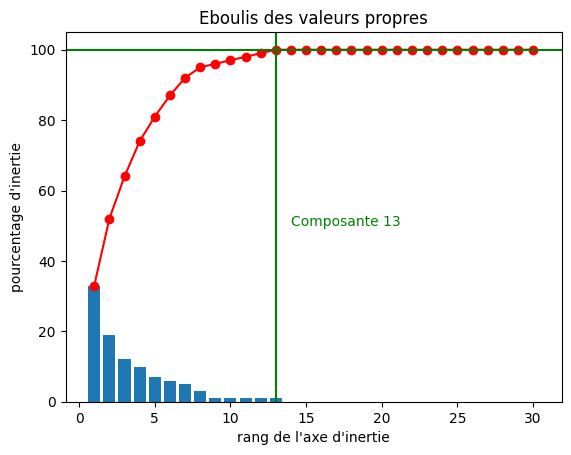

La totalité des variables utilisées pour calculer les notes santé et environnement 
peuvent être expliquées à 100% par 13 composantes.


In [7]:
# Eboulis des valeurs propres et nombre de composantes utiles : 
# Récupération des variances captées par les composantes : 
explained_variance_ratio = (pca.explained_variance_ratio_).round(2)
explained_variance_ratio = explained_variance_ratio*100

# Création des variances cumulées
cumulative_variance = np.cumsum(explained_variance_ratio).round()
nb_composantes = np.argmax(cumulative_variance >= 100) + 1

# Création d'une liste des numéros de compasantes : 
x_list = list(range(1, n_components+1))

# Création du graphique Eboulis : 
plt.figure()
plt.bar(x_list, explained_variance_ratio)
plt.plot(x_list, cumulative_variance,c="red",marker='o')
plt.axvline(nb_composantes, color='green')
plt.axhline(100, color='green')
plt.text(nb_composantes+1, 50,f'Composante {nb_composantes}', color='green')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()


print(f"La totalité des variables utilisées pour calculer les notes santé et environnement \n"
      f"peuvent être expliquées à 100% par {nb_composantes} composantes.")

In [8]:
# Création d'un DataFrame des coefficient de chaque variable pour chaque composante : 

# Création de pcs, valeurs des composantes : 
pcs = pca.components_

# Création du DataFrame : 
components = pd.DataFrame(pcs)

# Création des colonnes et index : 
components.columns = df.columns
components.index = [f"F{i}" for i in x_list]


# Arrondi des valeurs : (pour simplifier la lecture mais perte de précision)
components.round(2)

,energy_100g,fat_100g,saturated-fat_100g,salt_100g,sugars_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,...,alcohol_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,label_bio,label_vege,packaging_plastique,packaging_metal,packaging_verre,packaging_papier
F1,-0.10,-0.05,-0.01,-0.01,-0.07,-0.00,-0.00,0.00,0.00,-0.00,...,0.00,-0.02,0.01,0.01,0.26,0.80,0.47,0.03,0.04,0.21
F2,0.16,0.11,0.04,-0.00,0.05,-0.00,0.00,-0.00,0.00,0.00,...,-0.01,0.04,0.04,0.02,-0.32,-0.39,0.79,-0.01,-0.08,0.27
F3,0.69,0.46,0.16,-0.02,0.34,0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.03,0.00,0.23,0.11,-0.18,0.04,-0.02,0.27
F4,-0.23,-0.18,-0.04,0.00,-0.03,0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.01,0.02,0.01,-0.16,-0.04,-0.31,0.11,0.04,0.88
F5,-0.10,-0.39,-0.09,-0.02,0.89,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,0.08,0.01,0.00,0.00,0.02,0.06,0.00,0.04,-0.07
F6,0.08,0.12,0.03,-0.01,0.02,0.00,-0.00,0.00,0.00,-0.00,...,0.02,-0.02,-0.01,-0.00,-0.51,0.19,-0.03,0.42,0.69,-0.13
F7,-0.10,-0.04,-0.03,0.01,-0.05,-0.00,0.00,-0.00,0.00,-0.00,...,0.00,0.01,0.02,0.00,0.70,-0.39,0.15,0.35,0.45,0.06
F8,-0.03,-0.02,0.02,0.00,0.01,-0.00,0.00,0.00,-0.00,0.00,...,-0.02,0.01,-0.01,-0.00,-0.03,0.03,-0.01,0.83,-0.55,-0.09
F9,-0.50,0.62,0.23,0.02,0.14,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.12,0.03,0.04,0.01,-0.01,0.01,-0.03,-0.04,-0.01
F10,0.10,-0.07,-0.03,0.02,-0.11,0.00,0.00,0.00,0.00,0.00,...,0.00,0.93,0.26,0.21,0.00,0.04,-0.03,0.00,0.02,-0.03


<Axes: >

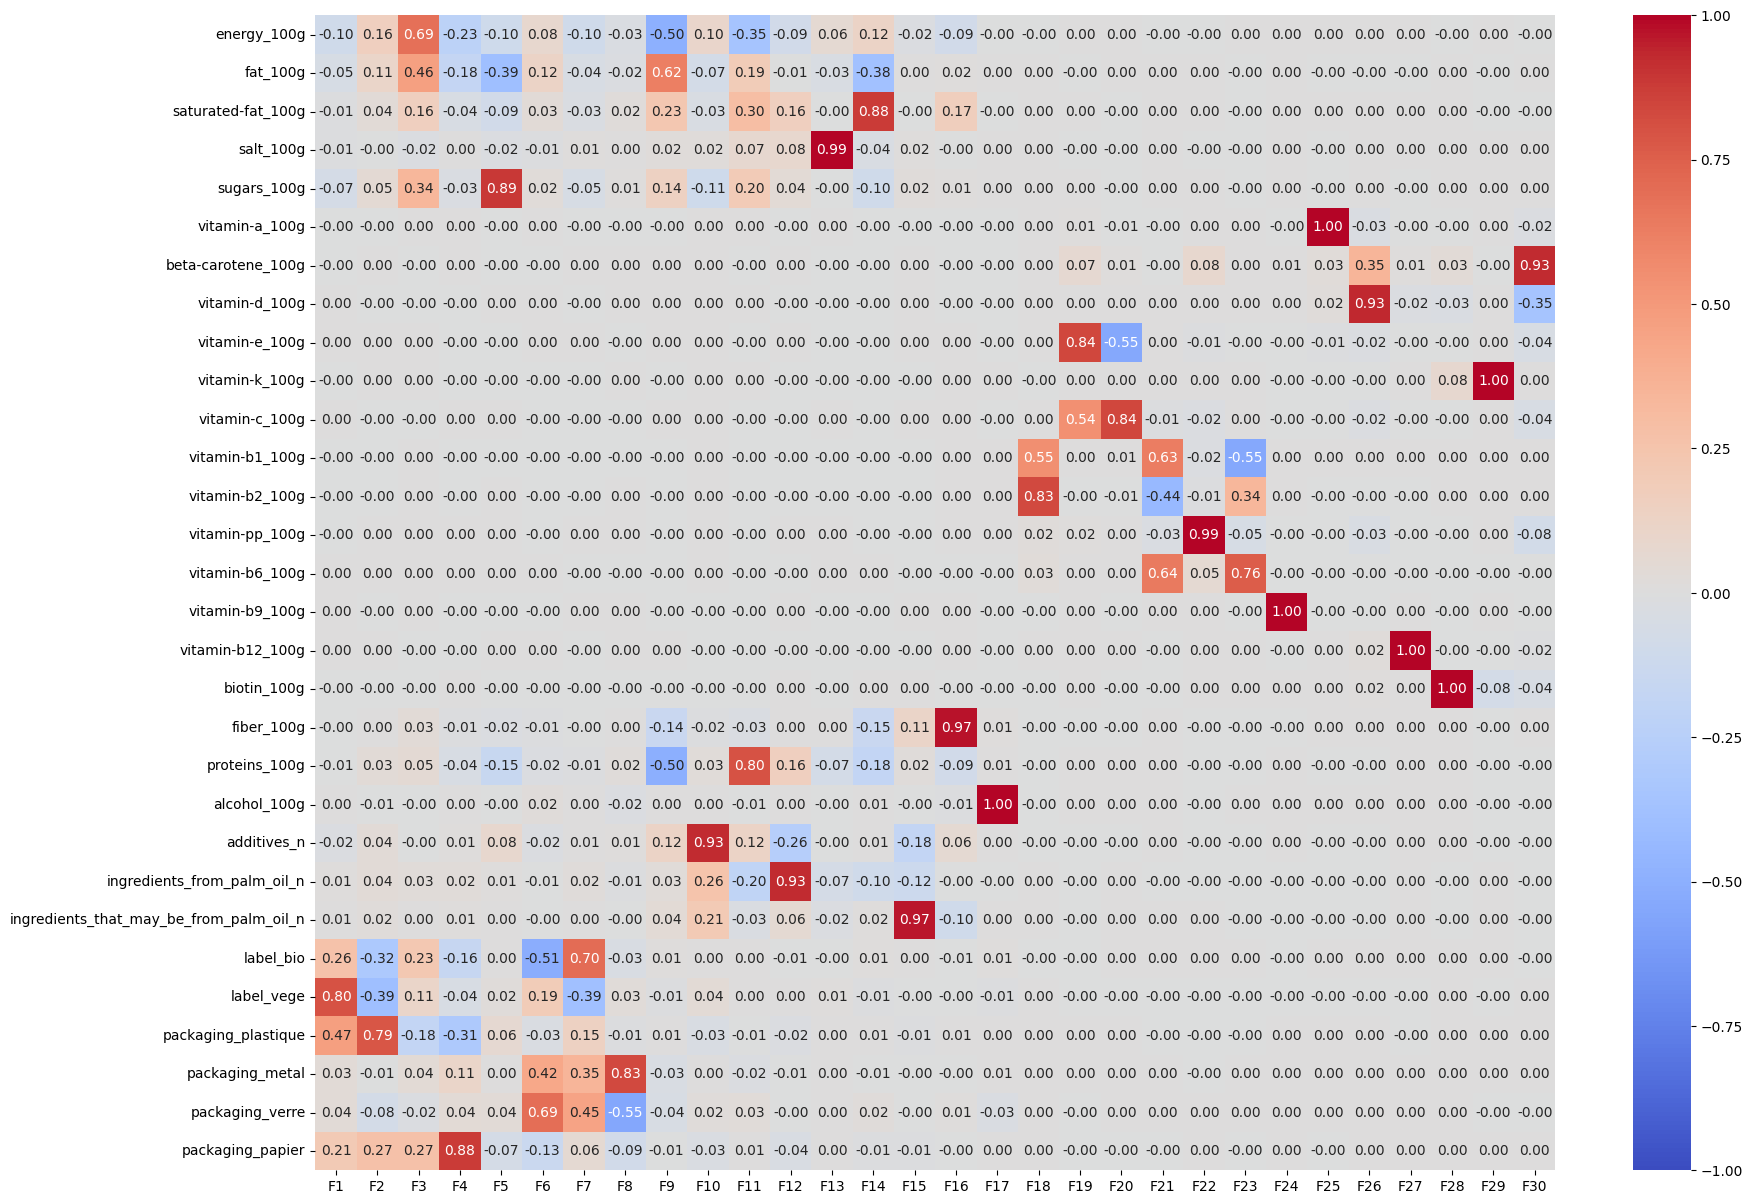

In [9]:
# Création d'une heatmap pour visualiser la dépendance de chaque composantes : 
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(components.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

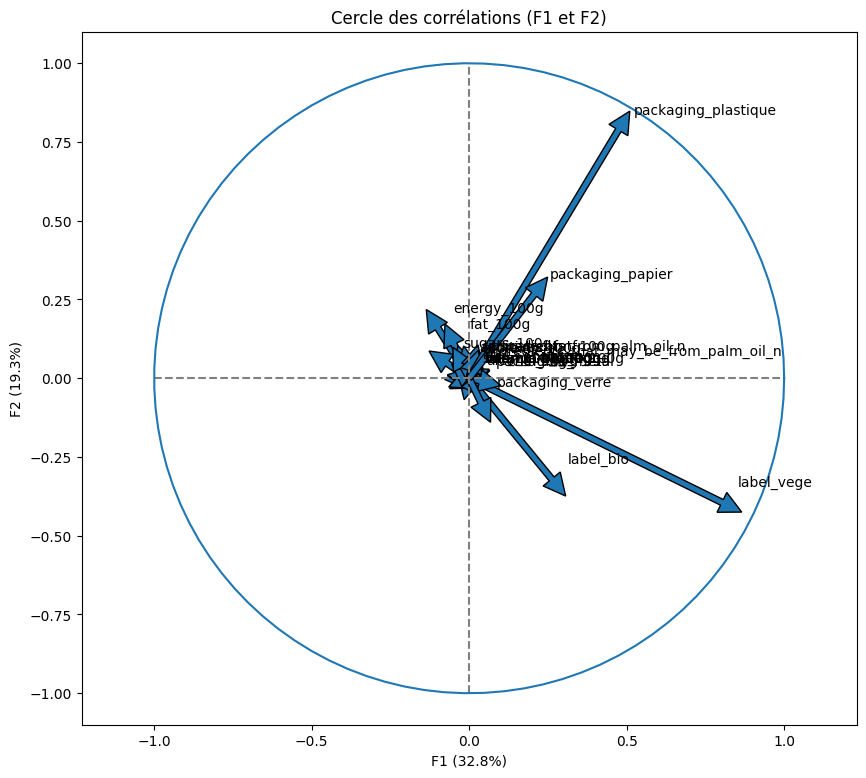

In [10]:
# Cercle de Corrélation pour les composantes F1 et F2 :
x_y =(0,1)
fct_projet_3.correlation_graph(pca, x_y, features)

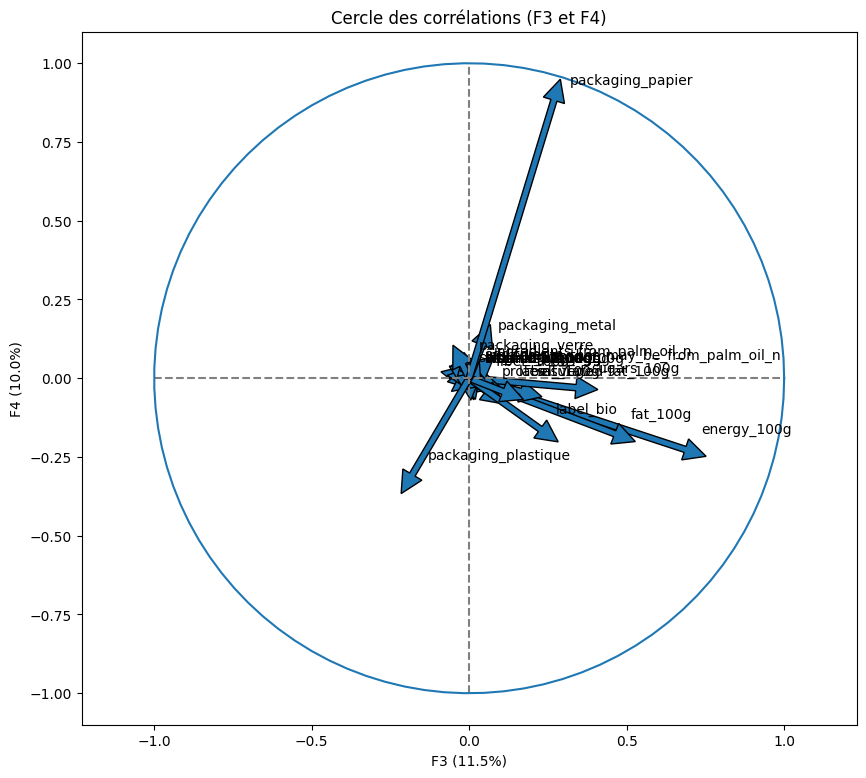

In [11]:
# Cercle de Corrélation pour les composantes F3 et F4 :
x_y =(2,3)
fct_projet_3.correlation_graph(pca, x_y, features)

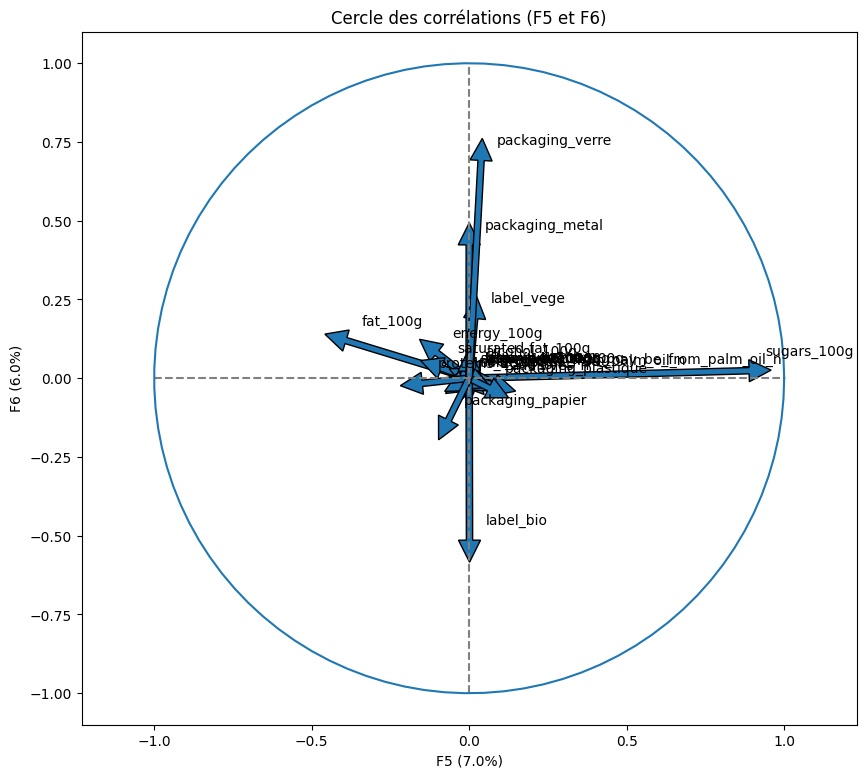

In [12]:
# Cercle de Corrélation pour les composantes F5 et F6 :
x_y =(4,5)
fct_projet_3.correlation_graph(pca, x_y, features)

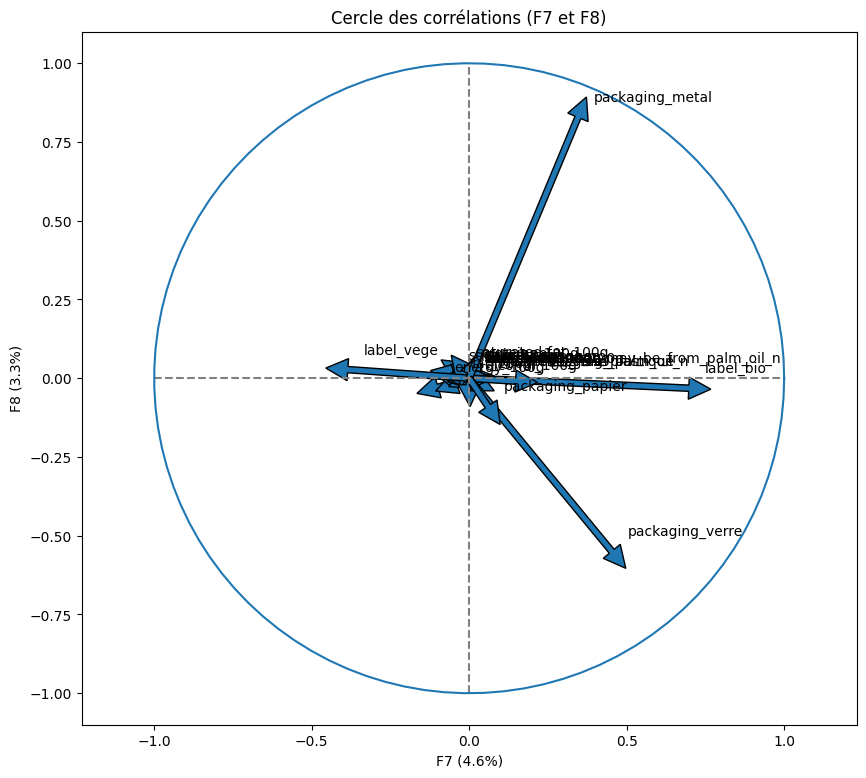

In [13]:
# Cercle de Corrélation pour les composantes F7 et F8 :
x_y =(6,7)
fct_projet_3.correlation_graph(pca, x_y, features)

Le dataset initial peut donc être réduit en dimension pour cette étude, en calculant à partir des variables les 13 premières composantes de cette ACP. 

Cependant, la compréhension des notes santé, environnement, total n'en sera que moins compréhensible dans leur construction. 

C'est pourquoi, il est préférable dans ce cas de ne pas réduire les dimensions du dataset. 

Nous remarquons cependant que l'ensemble des variables ne sont pas forcément influentes au même titre que les autres. 

En effet : 
- Pour le score environnement : les labels bio, vege, packaging et les ingrédients issus de l'huile de palme ont globalement une importance éqauivalentes et un sont donc toute pertientes pour le calcul du score environnement. 
- Pour le score santé : les variables les plus importantes et impactantes seront donc, l'énergie, le gras (le gras saturé dans une moindre mesure puisque fortement corrélé au gras), le sucre, les protéines, les additifs et légérement les fibres. 

## 6. <a id='toc6_'></a>[Visualisation des valeurs pour le score santé](#toc0_)

### 6.1. <a id='toc6_1_'></a>[Répartition des valeurs d'additifs](#toc0_)

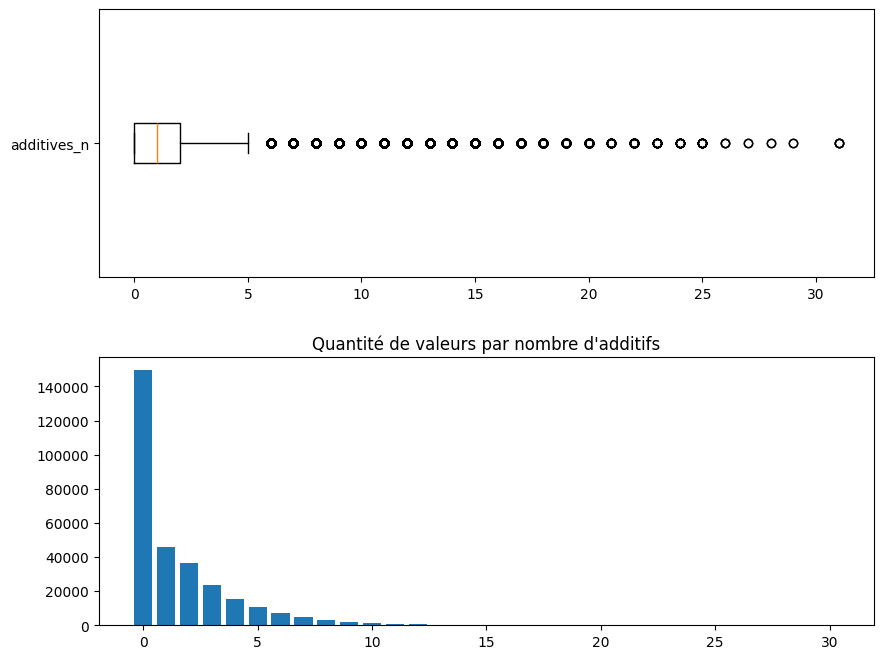

In [14]:
# Visualisation de la répartition des additifs : 
# Données : 
additifs = data.loc[:, 'additives_n']
y_bar = additifs.value_counts() 
x_bar = [n for n in range(len(y_bar))]

plt.figure(figsize=(10,8))
# Graph1 - Boxplot:
plt.subplot(2, 1, 1)
plt.boxplot(additifs, vert=False, labels=['additives_n'])

# Graph2 - Bar : 
plt.subplot(2, 1, 2)
plt.bar(x=x_bar, height=y_bar)
plt.title("Quantité de valeurs par nombre d'additifs")


plt.subplots_adjust(hspace=0.3)

plt.show()


### 6.2. <a id='toc6_2_'></a>[Répartition des valeurs energy](#toc0_)

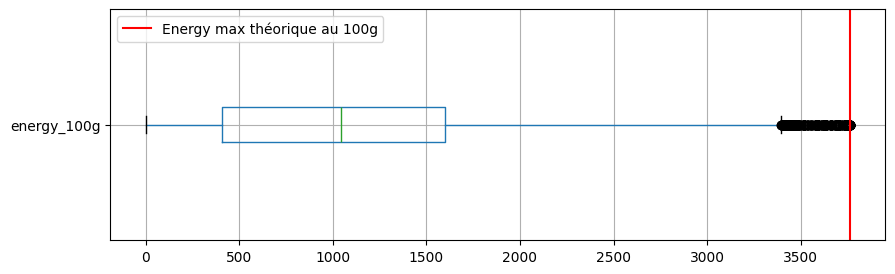

In [15]:
# Visualisation de la répartition de energy_1OOg : 
energy = pd.DataFrame(data.loc[:, 'energy_100g'])
plt.figure(figsize=(10, 3))

energy.boxplot(vert=False)
plt.axvline(x=3765.6, color='red', label='Energy max théorique au 100g')
plt.legend()
plt.show()

### 6.3. <a id='toc6_3_'></a>[Répartition des autres valeurs nutritionnelles](#toc0_)

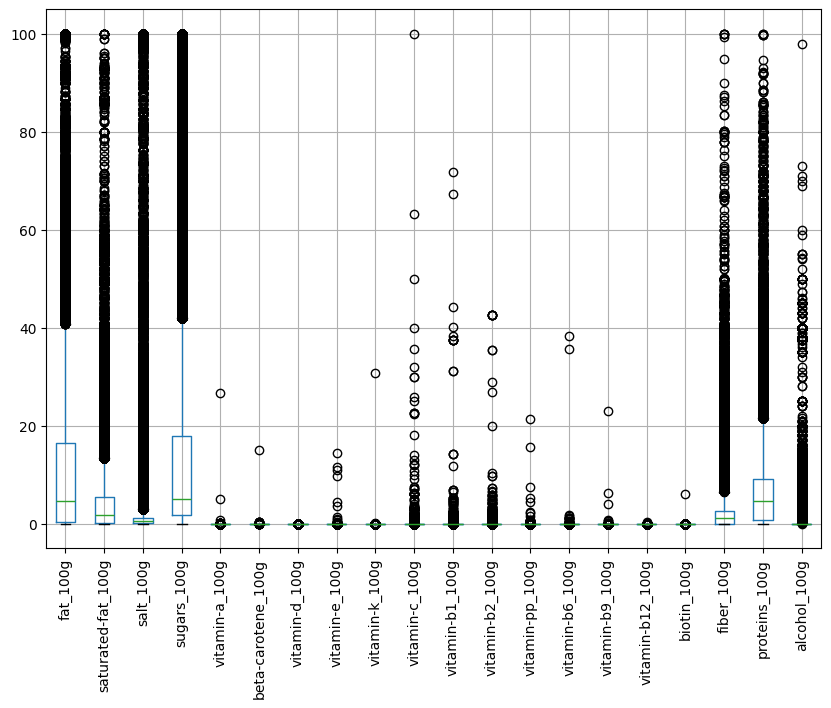

In [16]:
# Visualisation de la répartitions des autres valeurs nutritionnelles : 
df = data.loc[:, liste_nutritionnelle]

plt.figure(figsize=(10,7))

df.boxplot()

plt.xticks(rotation = 90)

plt.show()

del df

## 7. <a id='toc7_'></a>[Création du score](#toc0_)
### 7.1. <a id='toc7_1_'></a>[Score environnement](#toc0_)
Calcul à partir de : 

- ingredients_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil_n
- label_bio
- label_vege
- packaging_plasitique
- packaging_metal
- packaging_verre
- packaging_papier

#### 7.1.1. <a id='toc7_1_1_'></a>[Création des sous_notes](#toc0_)
##### 7.1.1.1. <a id='toc7_1_1_1_'></a>[Note packaging](#toc0_)

- coeff papier = 0 
- coeff verre = 1/3 
- coeff metal = 2/3 
- coeff plastique = 1

note entre 0 et 1 | 0 la meilleure note (100% papier) | 1 la pire note (100% plastique)

Si packaging non connnu --> On applique la moyenne des autres notes. 

In [17]:
# Création de note_packaging : 

# Création des séries : 
papier = data['packaging_papier']
verre = data['packaging_verre']
metal = data['packaging_metal']
plastique = data['packaging_plastique']

# Création des valeurs de points : 
pt_papier = 0 
pt_verre = 1/3 
pt_metal = 2/3
pt_plastique = 1


# Calcul : 
somme_elmt = papier + verre + metal + plastique
somme_coef = papier*pt_papier + verre*pt_verre + metal*pt_metal + plastique*pt_plastique
note = pd.Series(np.nan, somme_elmt.index)

for index, value in zip(somme_elmt.index, somme_elmt.values):
    if value !=0: 
        note[index] = somme_coef[index]/somme_elmt[index]

note_moy = note.mean()
for index, value in zip(somme_elmt.index, somme_elmt.values): 
    if value == 0: 
        note[index] = note_moy

data['note_packaging'] = note

del papier, verre, metal, plastique
del pt_metal, pt_papier, pt_plastique, pt_verre
del somme_coef, somme_elmt, note, note_moy

##### 7.1.1.2. <a id='toc7_1_1_2_'></a>[Note produits issus de l'huile de palme](#toc0_)
- ingredients_palm_oil / max 
- ingredients_maybe_palm_oil / max
- coef palm_oil = 0.65
- coef maybe_palm_oil = 0.35


note = (somme*coef) --> note entre 0 et 1 | 0 étant la meilleure note

In [18]:
# Création de note_palm_oil: 

# Création des séries : 
palm_oil = data['ingredients_from_palm_oil_n']
maybe_palm_oil = data['ingredients_that_may_be_from_palm_oil_n']

# Division par le maximum de chaque colonne : 
max_palm_oil = palm_oil.max()
max_maybe_palm_oil = maybe_palm_oil.max()

palm_oil = palm_oil / max_palm_oil
maybe_palm_oil = maybe_palm_oil / max_maybe_palm_oil

# Calcul de la note : 
somme = 0.65*palm_oil + 0.35*maybe_palm_oil

# Ajout de la colonne : 
data['note_palm_oil'] = somme

del palm_oil, maybe_palm_oil, max_maybe_palm_oil, max_palm_oil, somme

##### 7.1.1.3. <a id='toc7_1_1_3_'></a>[Note label](#toc0_)
- coef label_bio = -1 
- coef label_vege = -1 

note = (somme+2)/2 --> note entre 0 et 1 | 0 étant la meilleure note 

In [19]:
# Création de note_label : 

# Création des séries : 
bio = data['label_bio']
vege = data['label_vege']

# Calcul de la somme en pondérant par les coefficients : 
somme = -bio - vege

# Normalisation de la somme entre 0 et 1 : 
somme = (somme + 2) / 2

# Ajout de la colonne : 
data['note_label'] = somme 

del bio, vege, somme

#### 7.1.2. <a id='toc7_1_2_'></a>[Création de la note environnement](#toc0_)

Note sur 50 points | 0 points étant la meilleure note 

note = (note_packaging + note_pam_oil + note_label)*50/3

In [20]:
# Création de note_environnement : 

# Création des séries : 
packaging = data['note_packaging']
palm_oil = data['note_palm_oil']
label = data['note_label']

# Création de la note : 
somme = (packaging + palm_oil + label) / 3 *50

# Ajout de la colonne : 
data['note_environnement'] = somme

del packaging, palm_oil, label, somme

#### 7.1.3. <a id='toc7_1_3_'></a>[Visualisation](#toc0_)

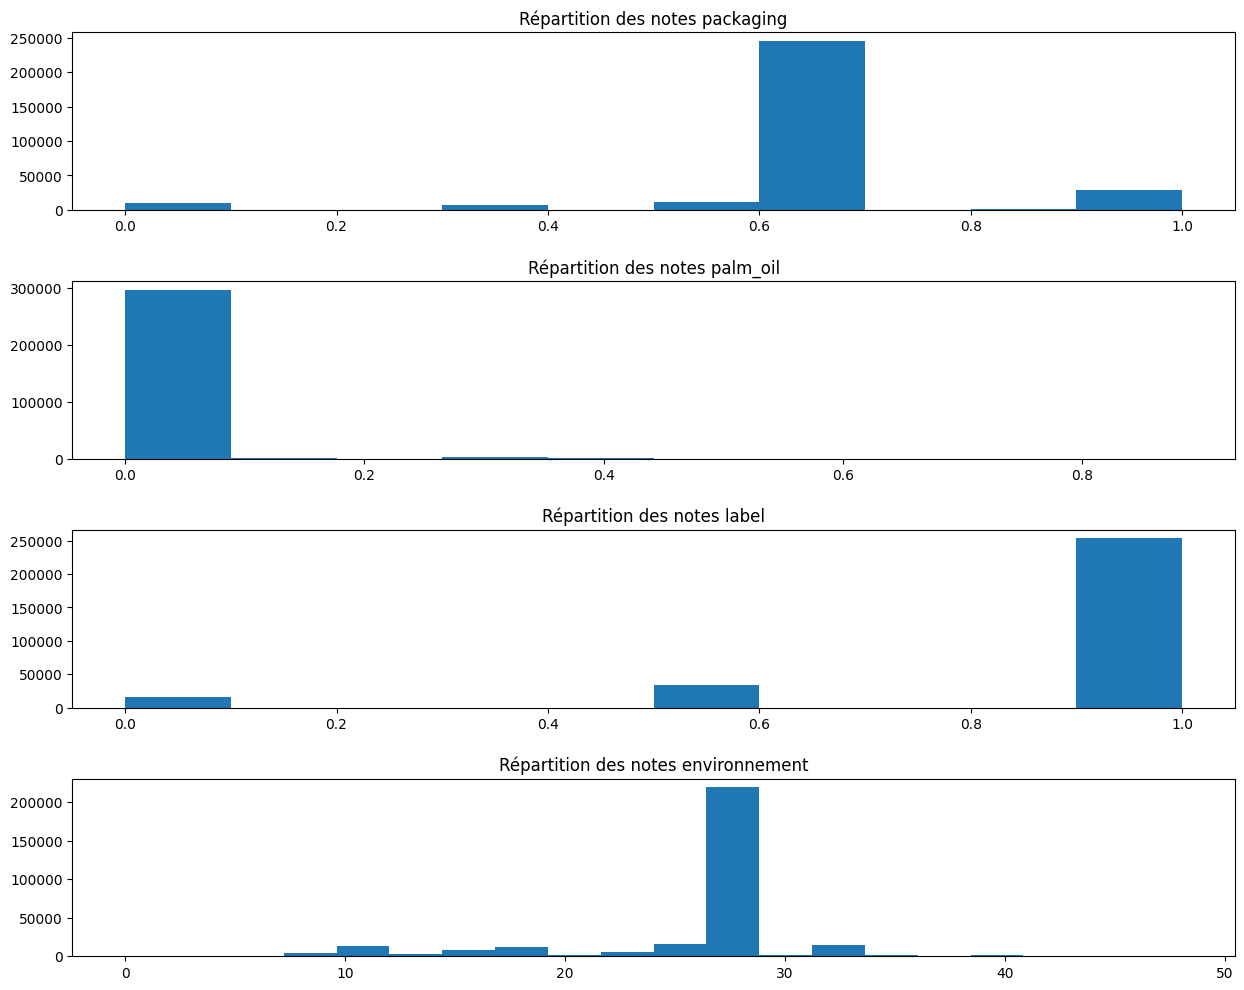

In [21]:
# Répartition des notes pour le score environnement : 
plt.figure(figsize=(15,12))

note_environnement = data['note_environnement']
note_packaging = data['note_packaging']
note_label = data['note_label']
note_palm_oil = data['note_palm_oil']

# Graph1 - histogramme note packaging :
plt.subplot(4, 1, 1)
plt.hist(note_packaging, bins=10)
plt.title('Répartition des notes packaging')

# Graph2 - histogramme note palm_oil:
plt.subplot(4, 1, 2)
plt.hist(note_palm_oil, bins=10)
plt.title("Répartition des notes palm_oil")

# Graph3 - histogramme note label :
plt.subplot(4, 1, 3)
plt.hist(note_label, bins=10)
plt.title('Répartition des notes label')

# Graph4 - histogramme note enironnement :
plt.subplot(4, 1, 4)
plt.hist(note_environnement, bins=20)
plt.title('Répartition des notes environnement')

plt.subplots_adjust(hspace=0.4)


plt.show()
del note_environnement, note_label, note_palm_oil, note_packaging

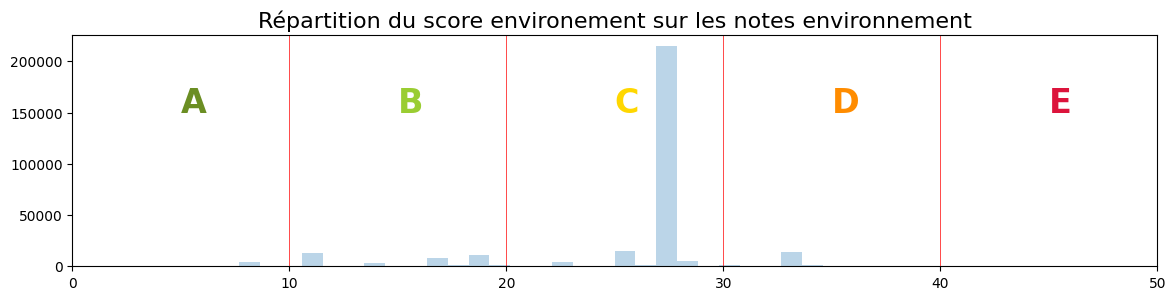

In [22]:
# Visualisation de la répartion des scores environnement : 
note_environnement = data['note_environnement']
fontsize = 16
fontsize_1 = 24

plt.figure(figsize=(14, 3))

plt.hist(note_environnement, bins=50, alpha=0.3)
plt.xlim(0, 50)
for x in range(0,50,10):
    plt.axvline(x, color='r', linewidth=0.5)

plt.text(5,150000, 'A', color='olivedrab', weight='bold', fontsize=fontsize_1)
plt.text(15,150000, 'B', color='yellowgreen', weight='bold', fontsize=fontsize_1)
plt.text(25,150000, 'C',  color='gold', weight='bold', fontsize=fontsize_1)
plt.text(35,150000, 'D',  color='darkorange', weight='bold', fontsize=fontsize_1)
plt.text(45,150000, 'E',  color='crimson', weight='bold', fontsize=fontsize_1)

plt.title('Répartition du score environement sur les notes environnement', fontsize=fontsize)

plt.show()

del note_environnement, fontsize, fontsize_1

#### 7.1.4. <a id='toc7_1_4_'></a>[Création du score environnement](#toc0_)

le score sera une lettre allant de A à E | A étant le meilleur score : 
- A : 0 <= note_environnement <= 10
- B : 10 < note_environnement <= 20
- C : 20 < note_environnement <= 30
- D : 30 < note_environnement <= 40
- E : 40 < note_environnement <= 50

In [23]:
# Création du score environnement :
# Création des series : 
note_environnement = data['note_environnement']
score_environnement = pd.Series(np.nan, note_environnement.index)

# Création du score : 
for value, index in zip(note_environnement.values, note_environnement.index): 
    if 0 <= value < 10: 
        score_environnement.iloc[index] = 'A'
    elif 10 <= value < 20: 
        score_environnement.iloc[index] = 'B'
    elif 20 <= value < 30: 
        score_environnement.iloc[index] = 'C'
    elif 30 <= value < 40: 
        score_environnement.iloc[index] = 'D'
    elif 40 <= value <= 50: 
        score_environnement.iloc[index] = 'E'
    else:
        continue
        
# Création de la colonne : 
data['score_environnement'] = score_environnement

del note_environnement, score_environnement

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_13937/69746676.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'C' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  score_environnement.iloc[index] = 'C'


### 7.2. <a id='toc7_2_'></a>[Score santé](#toc0_)
Calcul à partir de :
- valeurs nutritionnelles (energie, gras, sucre...)
- additives_n
#### 7.2.1. <a id='toc7_2_1_'></a>[Création des sous_notes](#toc0_)
##### 7.2.1.1. <a id='toc7_2_1_1_'></a>[Note additifs](#toc0_)
note = additif/max --> score entre 0 et 1 | 0 étant la meilleure note

In [24]:
# Création de note_additifs : 

# Création de la série : 
additif = data['additives_n']

# Normalisation entre 0 et 1 : 
max_add = additif.max()
additif = additif / max_add

# Ajout de la colonne : 
data['note_additifs'] = additif

del additif, max_add

##### 7.2.1.2. <a id='toc7_2_1_2_'></a>[Note nutritionnelle](#toc0_)
- mauvais éléments : 
    - note_energie = energie / max_energy_théorique --> score entre 0 et 1 | 0 étnt la meilleure note 
    - note_gras = [2/3*(saturated/100) + 1/3*((fat-saturated)/100)]/note_fat.max() --> score entre 0 et 1 | 0 étant la meilleure note
    - note_sel = sel/100 --> score entre 0 et 1 | 0 étant la meilleure note
    - note_sucre = sucre/100 --> score entre 0 et 1 | 0 étant la meilleure note
    - note_alcool = alcool/100  --> score entre 0 et 1 | 0 étant la meilleure note
- bons éléments : 
    - note_vitamines = somme(colonne_vitamines) / 100 --> score entre 0 et 1 | 1 étant la meilleure note
    - note_proteines = proteines / 100 --> score entre 0 et 1 | 1 étant la meilleure note
    - note_fibres = fibres / 100 --> score entre 0 et 1 | 1 étant la meilleure note
    
note_1 = energie + gras + sel + sucre + alcool - vitamines - proteines - fibres

note = (note_1 - (note_1.min()) / (note_1.max() - (note_1.min()) --> note entre 0 et 1 | 0 étant la meilleure note 


In [25]:
# Création de notes pour chaque valeur nutritionnelles : 

# Création des séries : 
energie = data['energy_100g']
fat = data['fat_100g']
saturated_fat= data['saturated-fat_100g']
sel = data['salt_100g']
sucre = data['sugars_100g']
alcool = data['alcohol_100g']

ls_vitamines = liste_nutritionnelle[4: -3]
vitamines = pd.Series(0, data.index)
for vit in ls_vitamines: 
    vitamines += data[vit]

proteines = data['proteins_100g']
fibres = data['fiber_100g']

# Création des notes : 
    # note_energie : 
max_energie = 3765.6 #maximum théorique energétique d'un produit pour 100g
note_energie = energie / max_energie
del max_energie, energie

    # note_fat : 
note_fat = (2/3 * (saturated_fat/100)) + (1/3 * (fat - saturated_fat)/100)
note_fat = note_fat/note_fat.max()
del saturated_fat, fat

    # note_sel : 
note_sel = sel/100 
del sel 

    # note_sucre :
note_sucre = sucre/100
del sucre 

    # note_alcool :
note_alcool = alcool/100
del alcool

    # note_vitamines : 
note_vitamines = vitamines/100
del vitamines

    # note_proteines : 
note_proteines = proteines/100
del proteines

    # note_fibres : 
note_fibres = fibres/100
del fibres

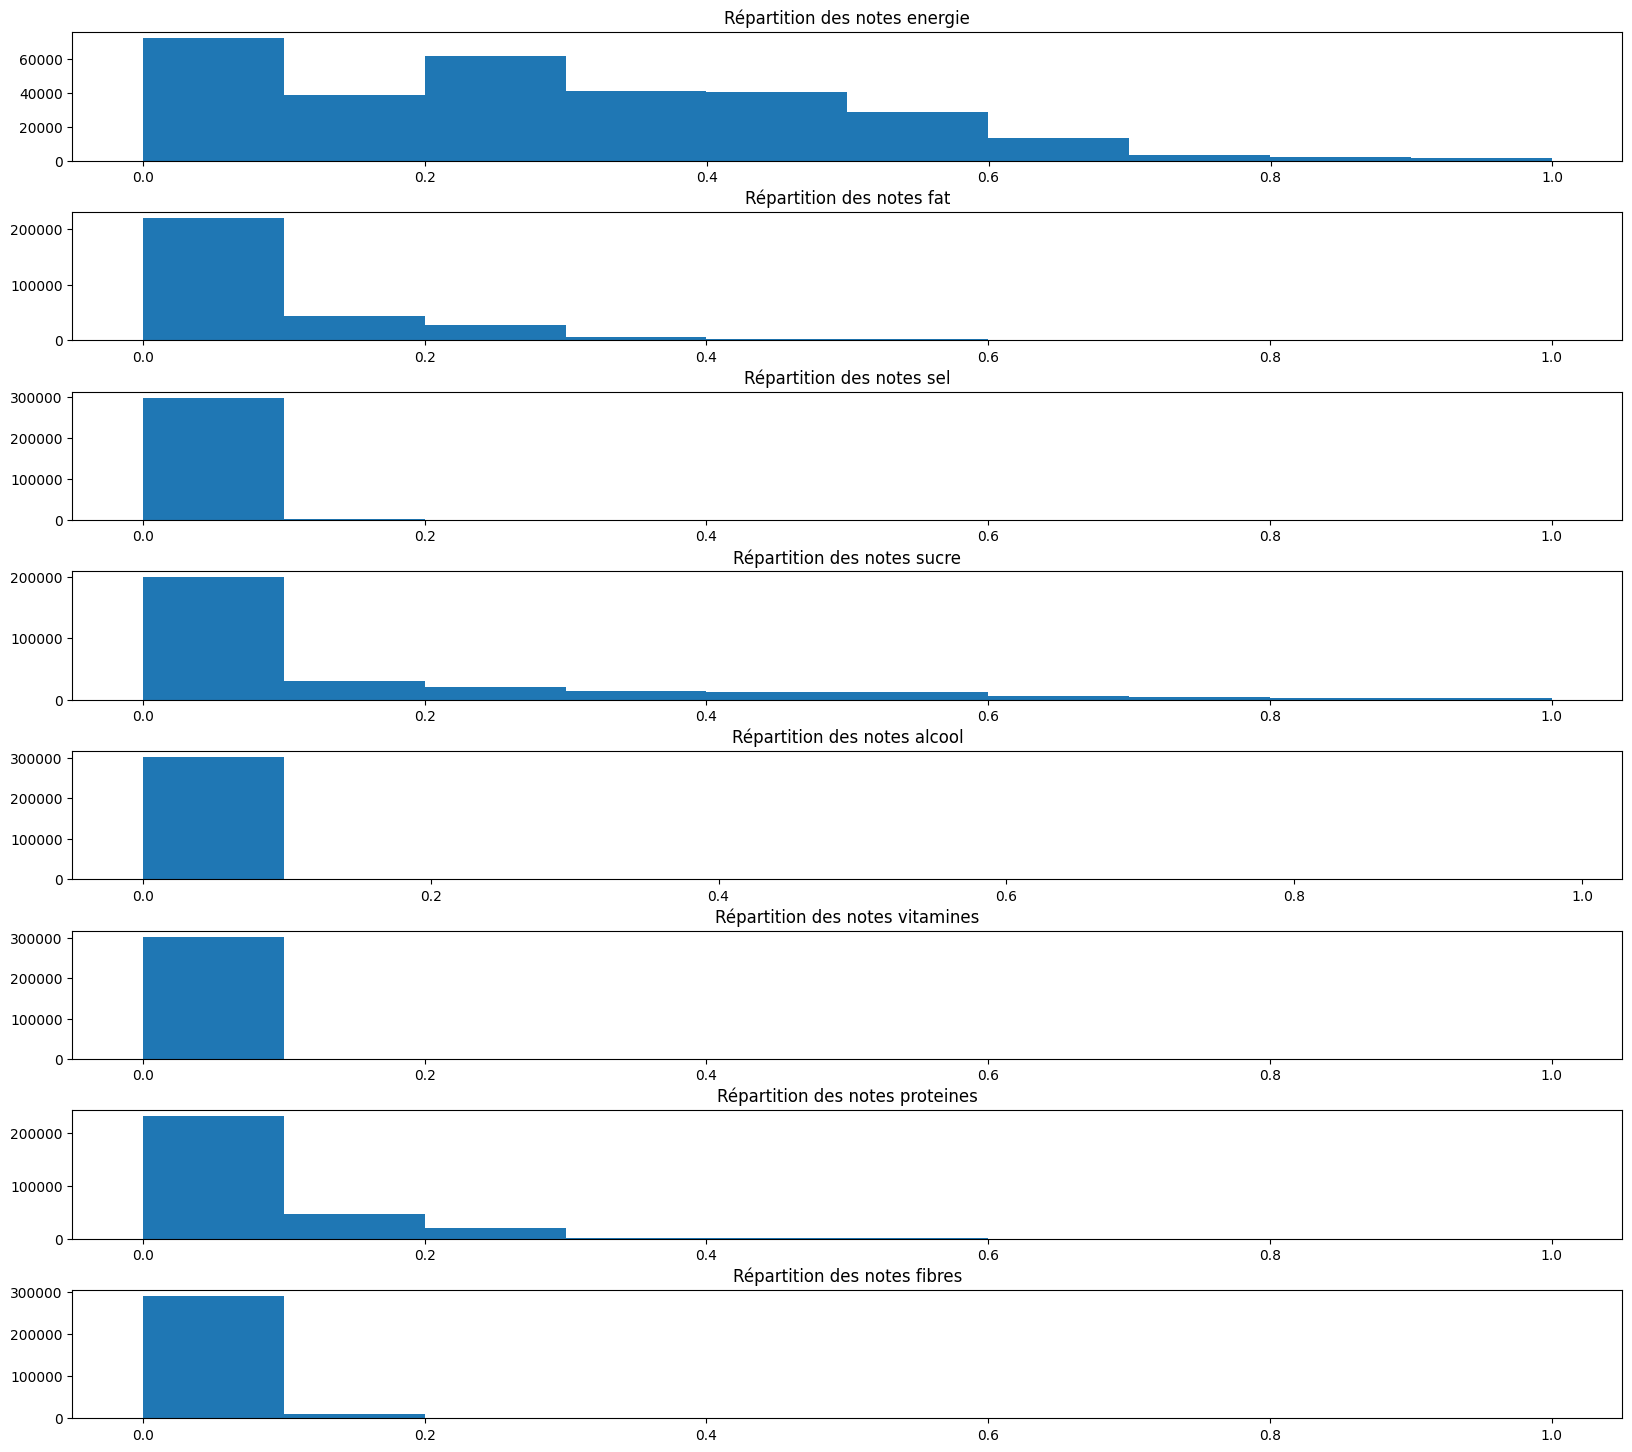

In [26]:
# Visualisation de la répartition des notes de chaques valeurs nutritionnelles : 

plt.figure(figsize=(20, 18))

bins = 10

# Graph1 - histogramme note energie :
plt.subplot(8, 1, 1)
plt.hist(note_energie, bins=bins)
plt.title('Répartition des notes energie')

# Graph2 - histogramme note fat :
plt.subplot(8, 1, 2)
plt.hist(note_fat, bins=bins)
plt.title('Répartition des notes fat')

# Graph3 - histogramme note sel :
plt.subplot(8, 1, 3)
plt.hist(note_sel, bins=bins)
plt.title('Répartition des notes sel')

# Graph4 - histogramme note sucre :
plt.subplot(8, 1, 4)
plt.hist(note_sucre, bins=bins)
plt.title('Répartition des notes sucre')

# Graph5 - histogramme note alcool :
plt.subplot(8, 1, 5)
plt.hist(note_alcool, bins=bins)
plt.title('Répartition des notes alcool')

# Graph6 - histogramme note vitamines :
plt.subplot(8, 1, 6)
plt.hist(note_vitamines, bins=bins)
plt.title('Répartition des notes vitamines')

# Graph7 - histogramme note proteines :
plt.subplot(8, 1, 7)
plt.hist(note_proteines, bins=bins)
plt.title('Répartition des notes proteines')

# Graph8 - histogramme note fibres :
plt.subplot(8, 1, 8)
plt.hist(note_fibres, bins=bins)
plt.title('Répartition des notes fibres')

plt.subplots_adjust(hspace=0.4)

plt.show()

In [27]:
# Création des notes intermédiaires : 
note_bad_inter = note_energie + note_fat + note_sel + note_sucre + note_alcool
del note_energie, note_fat, note_sel, note_sucre, note_alcool

note_good_inter = -note_vitamines - note_proteines - note_fibres
del note_vitamines, note_proteines, note_fibres

# Création de la note : 
note = note_bad_inter + note_good_inter
del note_bad_inter, note_good_inter

# Noramlisation de la note entre 0 et 1 : 
note = (note - note.min()) /(note.max() - note.min())

# Ajout de la colonne : 
data['note_nutritionnelle'] = note
del note

#### 7.2.2. <a id='toc7_2_2_'></a>[Création de la note sante](#toc0_)
Note sur 50 points | 0 étant la meilleure note 

note = (note_nutritionelle + note_additif) * 25

In [28]:
# Création de la note_sante : 
# Création des séries : 
note_nutritionnelle = data['note_nutritionnelle']
note_additifs = data['note_additifs']

# Création de la note : 
note_sante = (note_nutritionnelle + note_additifs) * 25

# Ajout de la colonne : 
data['note_sante'] = note_sante


del note_additifs, note_nutritionnelle, note_sante

#### 7.2.3. <a id='toc7_2_3_'></a>[Visualisation](#toc0_)

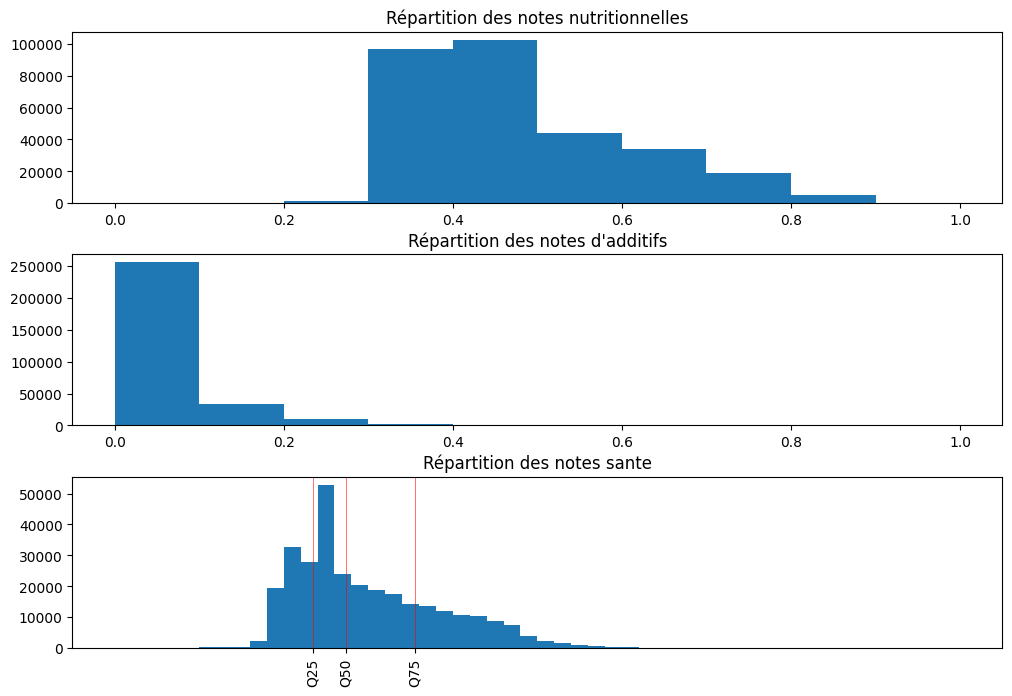

In [29]:
# Répartition des notes pour le score sante : 
plt.figure(figsize=(12,8))

note_sante = data['note_sante']
note_additifs = data['note_additifs']
note_nutritionnelle = data['note_nutritionnelle']
quantiles_sante = list(data['note_sante'].quantile([0.25, 0.50, 0.75,]))
stick_labels = ['Q25', 'Q50','Q75']


# Graph1 - histogramme note nutritionelle :
plt.subplot(3, 1, 1)
plt.hist(note_nutritionnelle, bins=10)
plt.title('Répartition des notes nutritionnelles')

# Graph2 - histogramme note additifs:
plt.subplot(3, 1, 2)
plt.hist(note_additifs, bins=10)
plt.title("Répartition des notes d'additifs")


# Graph3 - histogramme note sante :
plt.subplot(3, 1, 3)
plt.hist(note_sante, bins=50)

for q in quantiles_sante:
    plt.axvline(q, color='r', linewidth=0.4)
    
plt.xticks(quantiles_sante, stick_labels, rotation=90)
plt.title('Répartition des notes sante')


plt.subplots_adjust(hspace=0.3)

plt.show()
del note_additifs, note_nutritionnelle, note_sante, stick_labels, quantiles_sante

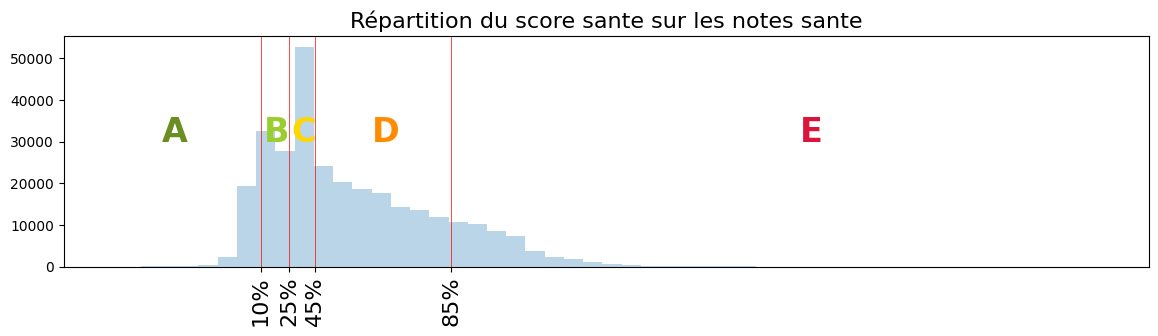

In [30]:
# Visualisation de la répartion des scores santé : 
note_sante = data['note_sante']
quantiles_score = list(data['note_sante'].quantile([0.1, 0.25, 0.45, 0.85]))
stick_labels = ['10%', '25%','45%', '85%']
fontsize = 16
fontsize_1 = 24

plt.figure(figsize=(14, 3))

plt.hist(note_sante, bins=50, alpha=0.3)
plt.xlim(0, 50)
for q in quantiles_score:
    plt.axvline(q, color='r', linewidth=0.5)

plt.text((quantiles_score[0])/2,30000, 'A', color='olivedrab', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[0] +(quantiles_score[1]-1-quantiles_score[0])/2,30000, 'B', color='yellowgreen', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[1] +(quantiles_score[2]-1-quantiles_score[1])/2,30000, 'C',  color='gold', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[2] +(quantiles_score[3]-1-quantiles_score[2])/2,30000, 'D',  color='darkorange', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[3] +(50-quantiles_score[3])/2,30000, 'E',  color='crimson', weight='bold', fontsize=fontsize_1)

plt.xticks(quantiles_score, stick_labels, rotation=90,fontsize=fontsize)
plt.title('Répartition du score sante sur les notes sante', fontsize=fontsize)

plt.show()

del note_sante, stick_labels, fontsize, fontsize_1

#### 7.2.4. <a id='toc7_2_4_'></a>[Création du score sante](#toc0_)

le score sera une lettre allant de A à E | A étant le meilleur score : 
- A : 0 <= note_sante <= Q10
- B : Q10 < note_sante <= Q25
- C : Q25 < note_sante <= Q45
- D : Q45 < note_sante <= Q85
- E : Q85 < note_sante <= 50

Q = Quantiles (de 10%, 25%, 45%, 85%)

In [31]:
# Création de score_sante: 

# Création des series : 
note_sante = data['note_sante']
score_sante = pd.Series(np.nan, note_sante.index)

# Création du score : 
for value, index in zip(note_sante.values, note_sante.index): 
    if 0 <= value < quantiles_score[0]: 
        score_sante[index] = 'A'
    elif quantiles_score[0] <= value < quantiles_score[1]: 
        score_sante[index] = 'B'
    elif quantiles_score[1] <= value < quantiles_score[2]: 
        score_sante[index] = 'C'
    elif quantiles_score[2] <= value < quantiles_score[3]:
        score_sante[index] = 'D'
    elif quantiles_score[3] <= value < 50: 
        score_sante[index] = 'E'
    else:
        continue
        
# Création de la colonne : 
data['score_sante'] = score_sante

del note_sante, score_sante, quantiles_score

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_13937/3328014461.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'C' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  score_sante[index] = 'C'


### 7.3. <a id='toc7_3_'></a>[Score produits](#toc0_)
#### 7.3.1. <a id='toc7_3_1_'></a>[Note totale](#toc0_)

La note totale du produit prend donc en compte l'aspect environnement pour 50% et l'aspect santé pour 50%

note_tot = note_sante + note_environnement --> note entre 0 et 100 | 0 étant la meilleure note 

In [32]:
# Création de note_tot : 

# Création des séries : 
note_sante = data['note_sante']
note_environnement = data['note_environnement']

# Création de la note_tot : 
note_tot = note_environnement + note_sante


# ajout de la colonne : 
data['note_tot'] = note_tot

del note_environnement, note_sante

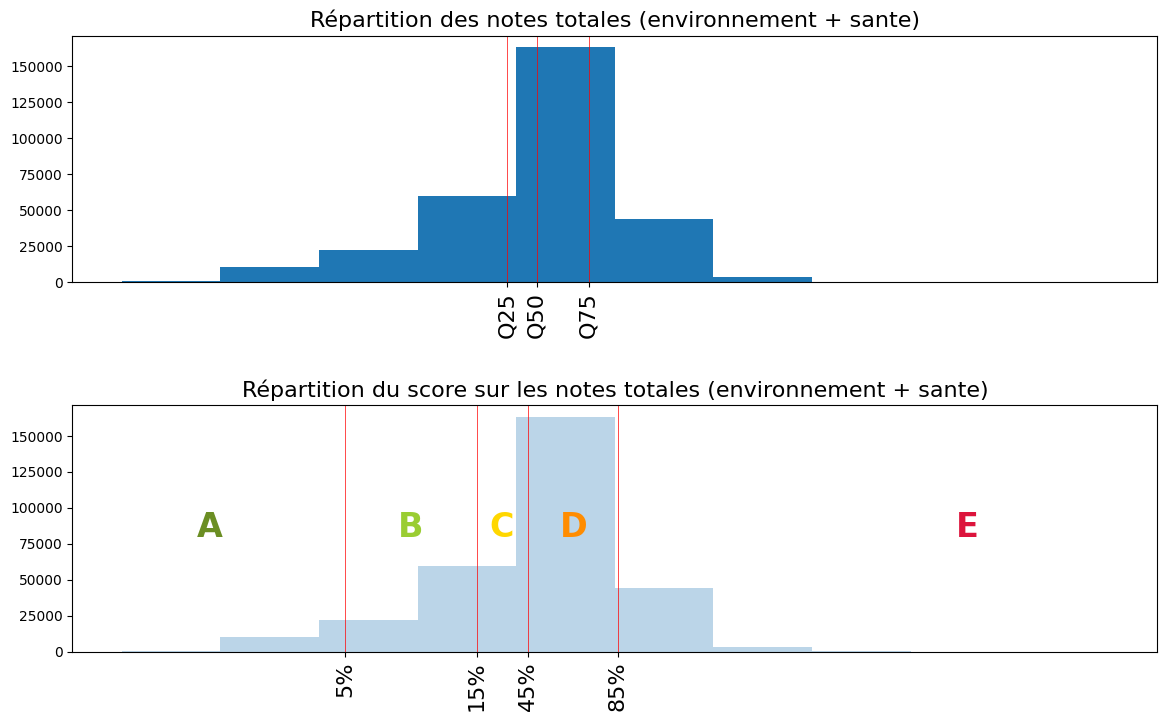

In [33]:
# Visualisation : 
bins = 10 
quantiles_note = list(data['note_tot'].quantile([0.25, 0.5, 0.75]))
quantiles_score = list(data['note_tot'].quantile([0.05, 0.15, 0.45, 0.85]))
stick_labels_score = ['5%', '15%','45%', '85%']
stick_labels_note = ['Q25','Q50', 'Q75']
fontsize = 16
fontsize_1 = 24

plt.figure(figsize=(14,8))

# Graph_1 - hist répartition de note_tot : 
plt.subplot(2,1,1)
plt.hist(note_tot, bins=bins)
plt.title('Répartition des notes totales (environnement + sante)', fontsize=fontsize)

for q in quantiles_note:
    plt.axvline(q, color='r', linewidth=0.5)

plt.xticks(quantiles_note, stick_labels_note, rotation=90,fontsize=fontsize)





# Graph_2 - hist répartition du score sur note_tot : 
plt.subplot(2,1,2)
plt.hist(note_tot, bins=bins, alpha=0.3)

for q in quantiles_score:
    plt.axvline(q, color='r', linewidth=0.5)

plt.text((quantiles_score[0])/2,80000, 'A', color='olivedrab', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[0] +(quantiles_score[1]-2-quantiles_score[0])/2,80000, 'B', color='yellowgreen', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[1] +(quantiles_score[2]-2-quantiles_score[1])/2,80000, 'C',  color='gold', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[2] +(quantiles_score[3]-2-quantiles_score[2])/2,80000, 'D',  color='darkorange', weight='bold', fontsize=fontsize_1)
plt.text(quantiles_score[3] +(100-quantiles_score[3])/2,80000, 'E',  color='crimson', weight='bold', fontsize=fontsize_1)
         
plt.title('Répartition du score sur les notes totales (environnement + sante)', fontsize=fontsize)
plt.xticks(quantiles_score, stick_labels_score, rotation=90,fontsize=fontsize)


plt.subplots_adjust(hspace=0.5)
plt.show()


#### 7.3.2. <a id='toc7_3_2_'></a>[Score total](#toc0_)
Le score_tot sera une lettre allant de A à E | A étant le meilleur score : 
- A : 0 <= note_sante <= Q5
- B : Q5 < note_sante <= Q15
- C : Q15 < note_sante <= Q45
- D : Q45 < note_sante <= Q85
- E : Q85 < note_sante <= 100

Q = Quantiles (de 5%, 15%, 45%, 85%)

In [34]:
# Création de score_tot : 

# Création des series : 
note_tot = data['note_tot']
score_tot = pd.Series(np.nan, note_tot.index)

# Création du score : 
for value, index in zip(note_tot.values, note_tot.index): 
    if 0 <= value < quantiles_score[0]: 
        score_tot[index] = 'A'
    elif quantiles_score[0] <= value < quantiles_score[1]: 
        score_tot[index] = 'B'
    elif quantiles_score[1] <= value < quantiles_score[2]: 
        score_tot[index] = 'C'
    elif quantiles_score[2] <= value < quantiles_score[3]: 
        score_tot[index] = 'D'
    elif quantiles_score[3] <= value < 100: 
        score_tot[index] = 'E'
    else:
        continue
        
# Création de la colonne : 
data['score_tot'] = score_tot

del note_tot, score_tot, quantiles_note, quantiles_score

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_13937/2945928937.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'D' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  score_tot[index] = 'D'


### 7.4. <a id='toc7_4_'></a>[Visualisation des scores](#toc0_)

In [35]:
# Moyenne de score vides : 

print('MOYENNE DE SCORE VIDES:')
print('--'*50)

moy_env = data['score_environnement'].isna().mean() *100
moy_sante = data['score_sante'].isna().mean() *100
moy_tot = data['score_tot'].isna().mean() *100
moy_nutriscore = data['nutrition_grade_fr'].isna().mean() *100

print(f'Moyenne de valeurs vides pour le score environnement : {moy_env:.2f} %')
print(f'Moyenne de valeurs vides pour le score santé : {moy_sante:.2f} %')
print(f'Moyenne de valeurs vides pour le score total : {moy_tot:.2f} %')
print(f'Moyenne de valeurs vides pour le nustiscore : {moy_nutriscore:.2f} %')
print('--'*50)

"""
mask_1 = df_selection['note_nutritionnelle'].isna()
mask_2 = df_selection['nutrition-score-fr_100g'].notna()
nb = len(df_selection.loc[mask_1 & mask_2])
nb_tot = len(df_selection)
completion = nb/nb_tot *100

print('Si une corrélation existe entre les nutrition-score-fr_100g et la note nutritionnelle : \n'
      f'     - Il est possible de compléter {completion:.2f} % des valeurs du score santé '
      'avec le nutriscore.\n'
      'Et donc de compléter le score total. ')

del mask_1, mask_2, nb, nb_tot
del completion
"""

del moy_env, moy_nutriscore, moy_sante, moy_tot

MOYENNE DE SCORE VIDES:
----------------------------------------------------------------------------------------------------
Moyenne de valeurs vides pour le score environnement : 0.00 %
Moyenne de valeurs vides pour le score santé : 0.00 %
Moyenne de valeurs vides pour le score total : 0.00 %
Moyenne de valeurs vides pour le nustiscore : 27.91 %
----------------------------------------------------------------------------------------------------


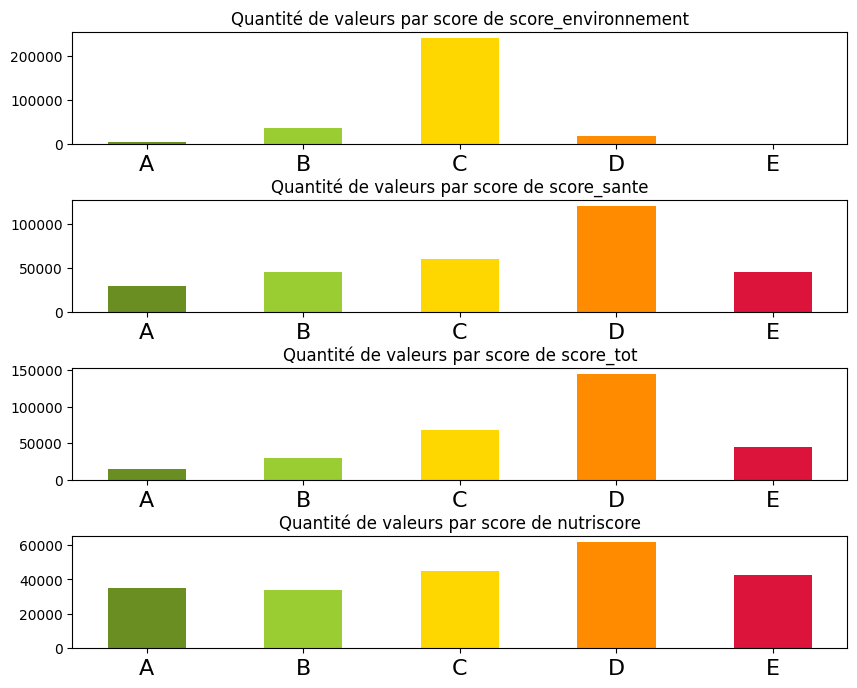

In [36]:
# Comparaison de la répartition des scores : 

# Score environnement : 
#Données : 
environnement = data['score_environnement']

y_bar = environnement.value_counts().sort_index()
x_bar = y_bar.index.to_list()
colors = []

for item in x_bar: 
    if item == 'A': 
        colors.append('olivedrab')
    elif item == 'B': 
        colors.append('yellowgreen')
    elif item == 'C': 
        colors.append('gold')
    elif item == 'D': 
        colors.append('darkorange')
    else:
        colors.append('crimson')


# Cration de la figure : 
plt.figure(figsize=(10,8))

# Graph_1 - diagramme bar pour le score environnement : 
plt.subplot(4, 1, 1)
plt.bar(x=x_bar, height=y_bar, width=0.5, color=colors)
plt.title('Quantité de valeurs par score de score_environnement')
plt.xticks(fontsize=16)

del environnement
#_________________________
#_________________________

# Score sante : 
#Données : 
sante = data['score_sante']

y_bar = sante.value_counts().sort_index()
x_bar = y_bar.index.to_list()
colors = []

for item in x_bar: 
    if item == 'A': 
        colors.append('olivedrab')
    elif item == 'B': 
        colors.append('yellowgreen')
    elif item == 'C': 
        colors.append('gold')
    elif item == 'D': 
        colors.append('darkorange')
    else:
        colors.append('crimson')

# Graph_2 - diagramme bar pour le score sante : 
plt.subplot(4, 1, 2)
plt.bar(x=x_bar, height=y_bar, width=0.5, color=colors)
plt.title('Quantité de valeurs par score de score_sante')
plt.xticks(fontsize=16)

del sante
#________________________
#________________________

# Score total : 
#Données : 
score_tot = data['score_tot']

y_bar = score_tot.value_counts().sort_index()
x_bar = y_bar.index.to_list()
colors = []

for item in x_bar: 
    if item == 'A': 
        colors.append('olivedrab')
    elif item == 'B': 
        colors.append('yellowgreen')
    elif item == 'C': 
        colors.append('gold')
    elif item == 'D': 
        colors.append('darkorange')
    else:
        colors.append('crimson')

# Graph_3 - diagramme bar pour le score total : 
plt.subplot(4, 1, 3)
plt.bar(x=x_bar, height=y_bar, width=0.5, color=colors)
plt.title('Quantité de valeurs par score de score_tot')
plt.xticks(fontsize=16)

del score_tot
#________________________
#________________________

# Score nutriscore : 

# Mise en majuscule des caractères : 
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].str.upper()

# Données : 
nutriscore = data['nutrition_grade_fr']

y_bar = nutriscore.value_counts().sort_index()
x_bar = y_bar.index.to_list()
colors = []

for item in x_bar: 
    if item == 'A': 
        colors.append('olivedrab')
    elif item == 'B': 
        colors.append('yellowgreen')
    elif item == 'C': 
        colors.append('gold')
    elif item == 'D': 
        colors.append('darkorange')
    else:
        colors.append('crimson')

# Graph_3 - diagramme bar pour le score nutriscore : 
plt.subplot(4, 1, 4)
plt.bar(x=x_bar, height=y_bar, width=0.5, color=colors)
plt.title('Quantité de valeurs par score de nutriscore')
plt.xticks(fontsize=16)

del nutriscore, colors

plt.subplots_adjust(hspace=0.5)

plt.show()

## 8. <a id='toc8_'></a>[Corrélation entre les variables](#toc0_)
### 8.1. <a id='toc8_1_'></a>[Nutrition-score vs score nutritionnelle](#toc0_)

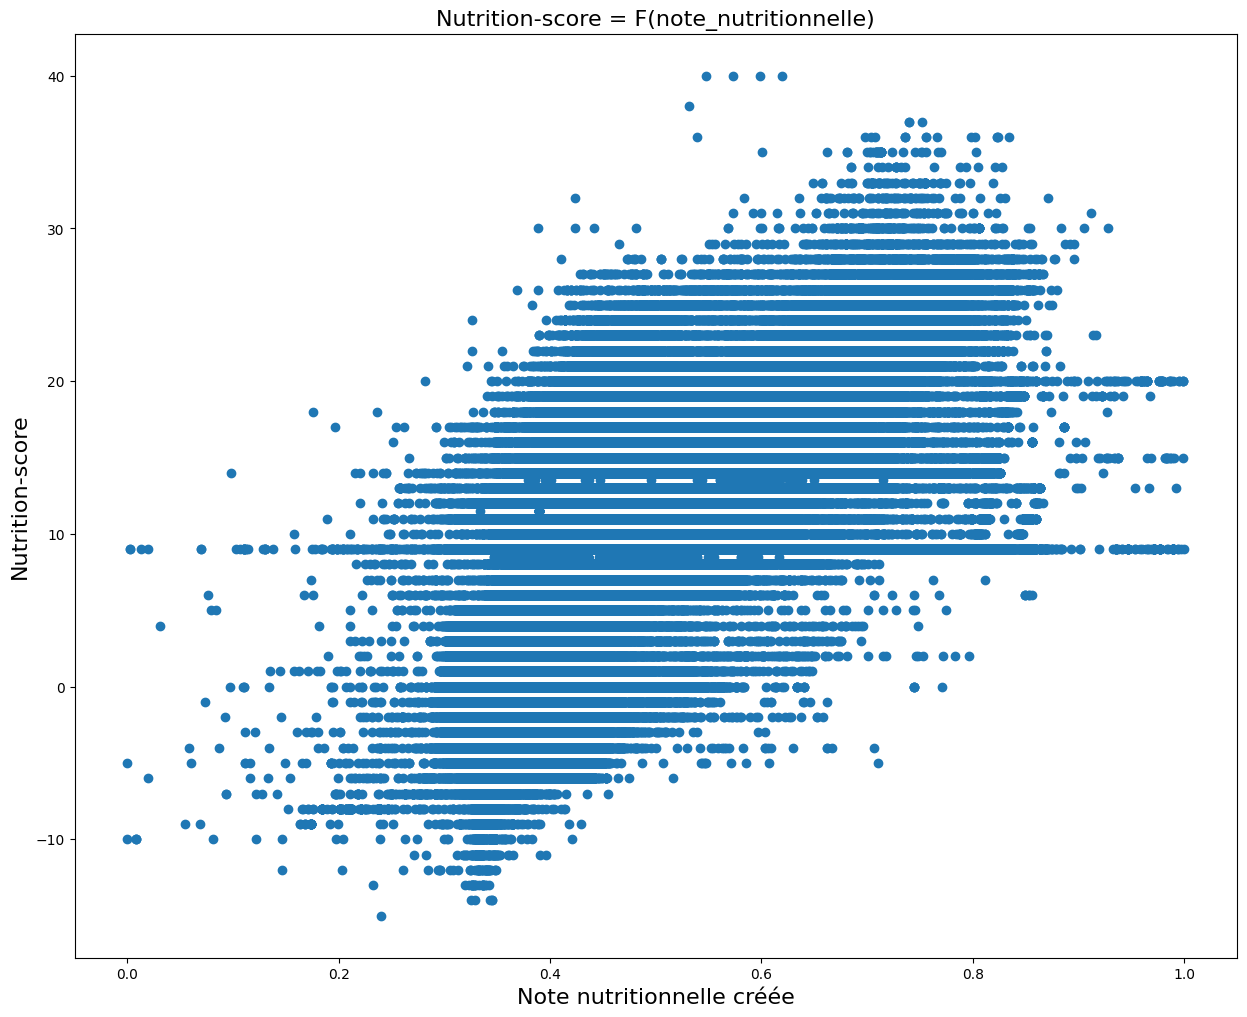

In [37]:
# Visualiation du nutrition-grade en fonction de la note nutritionelle : 
# création des séries : 
nutrition_grade = data['nutrition-score-fr_100g']
note_nutritionnelle = data['note_nutritionnelle']


plt.figure(figsize=(15, 12))

plt.scatter(x=note_nutritionnelle, y= nutrition_grade)
plt.xlabel('Note nutritionnelle créée', fontsize=16)
plt.ylabel('Nutrition-score', fontsize=16)
plt.title('Nutrition-score = F(note_nutritionnelle)', fontsize=16)


plt.show()

del nutrition_grade, note_nutritionnelle

In [38]:
# Corrélation entre les variables : 

coef_pearson = data['nutrition-score-fr_100g'].corr(data['note_nutritionnelle'])

print('Coefficient de pearson entre nutrition-score et note_nutritionelle :', coef_pearson)
del coef_pearson

Coefficient de pearson entre nutrition-score et note_nutritionelle : 0.6705054773216075


Le coeffcient de Pearson est supérier à 0.5 --> il existe une forte corrélation linéaire positive entre les deux variable. 

Le nuage de points étant très étalé, il est difficile de mettre en place une corrélation linéaire directement entre le score nutritionnelle et le nutriscore. 

### 8.2. <a id='toc8_2_'></a>[Valeurs de la note santé vs note santé](#toc0_)
#### 8.2.1. <a id='toc8_2_1_'></a>[Matrice de corrélation sur l'ensemble des valeurs de la note santé](#toc0_)

In [39]:
# Visualisation de la sélection des données : 
# Création de la liste des colonnes pour la matrice : 
ls_col_corr = [x for x in liste_sante if x != 'nutrition_grade_fr']
ls_col_corr.append('note_sante')

# Impression de la liste : 
print("Liste des colonnes sélectionnées pour la matrice de corrélation :\n")
x =''
for i in ls_col_corr: 
    x += i +' | '
print(x)

Liste des colonnes sélectionnées pour la matrice de corrélation :

energy_100g | fat_100g | saturated-fat_100g | salt_100g | sugars_100g | vitamin-a_100g | beta-carotene_100g | vitamin-d_100g | vitamin-e_100g | vitamin-k_100g | vitamin-c_100g | vitamin-b1_100g | vitamin-b2_100g | vitamin-pp_100g | vitamin-b6_100g | vitamin-b9_100g | vitamin-b12_100g | biotin_100g | fiber_100g | proteins_100g | alcohol_100g | additives_n | nutrition-score-fr_100g | note_sante | 


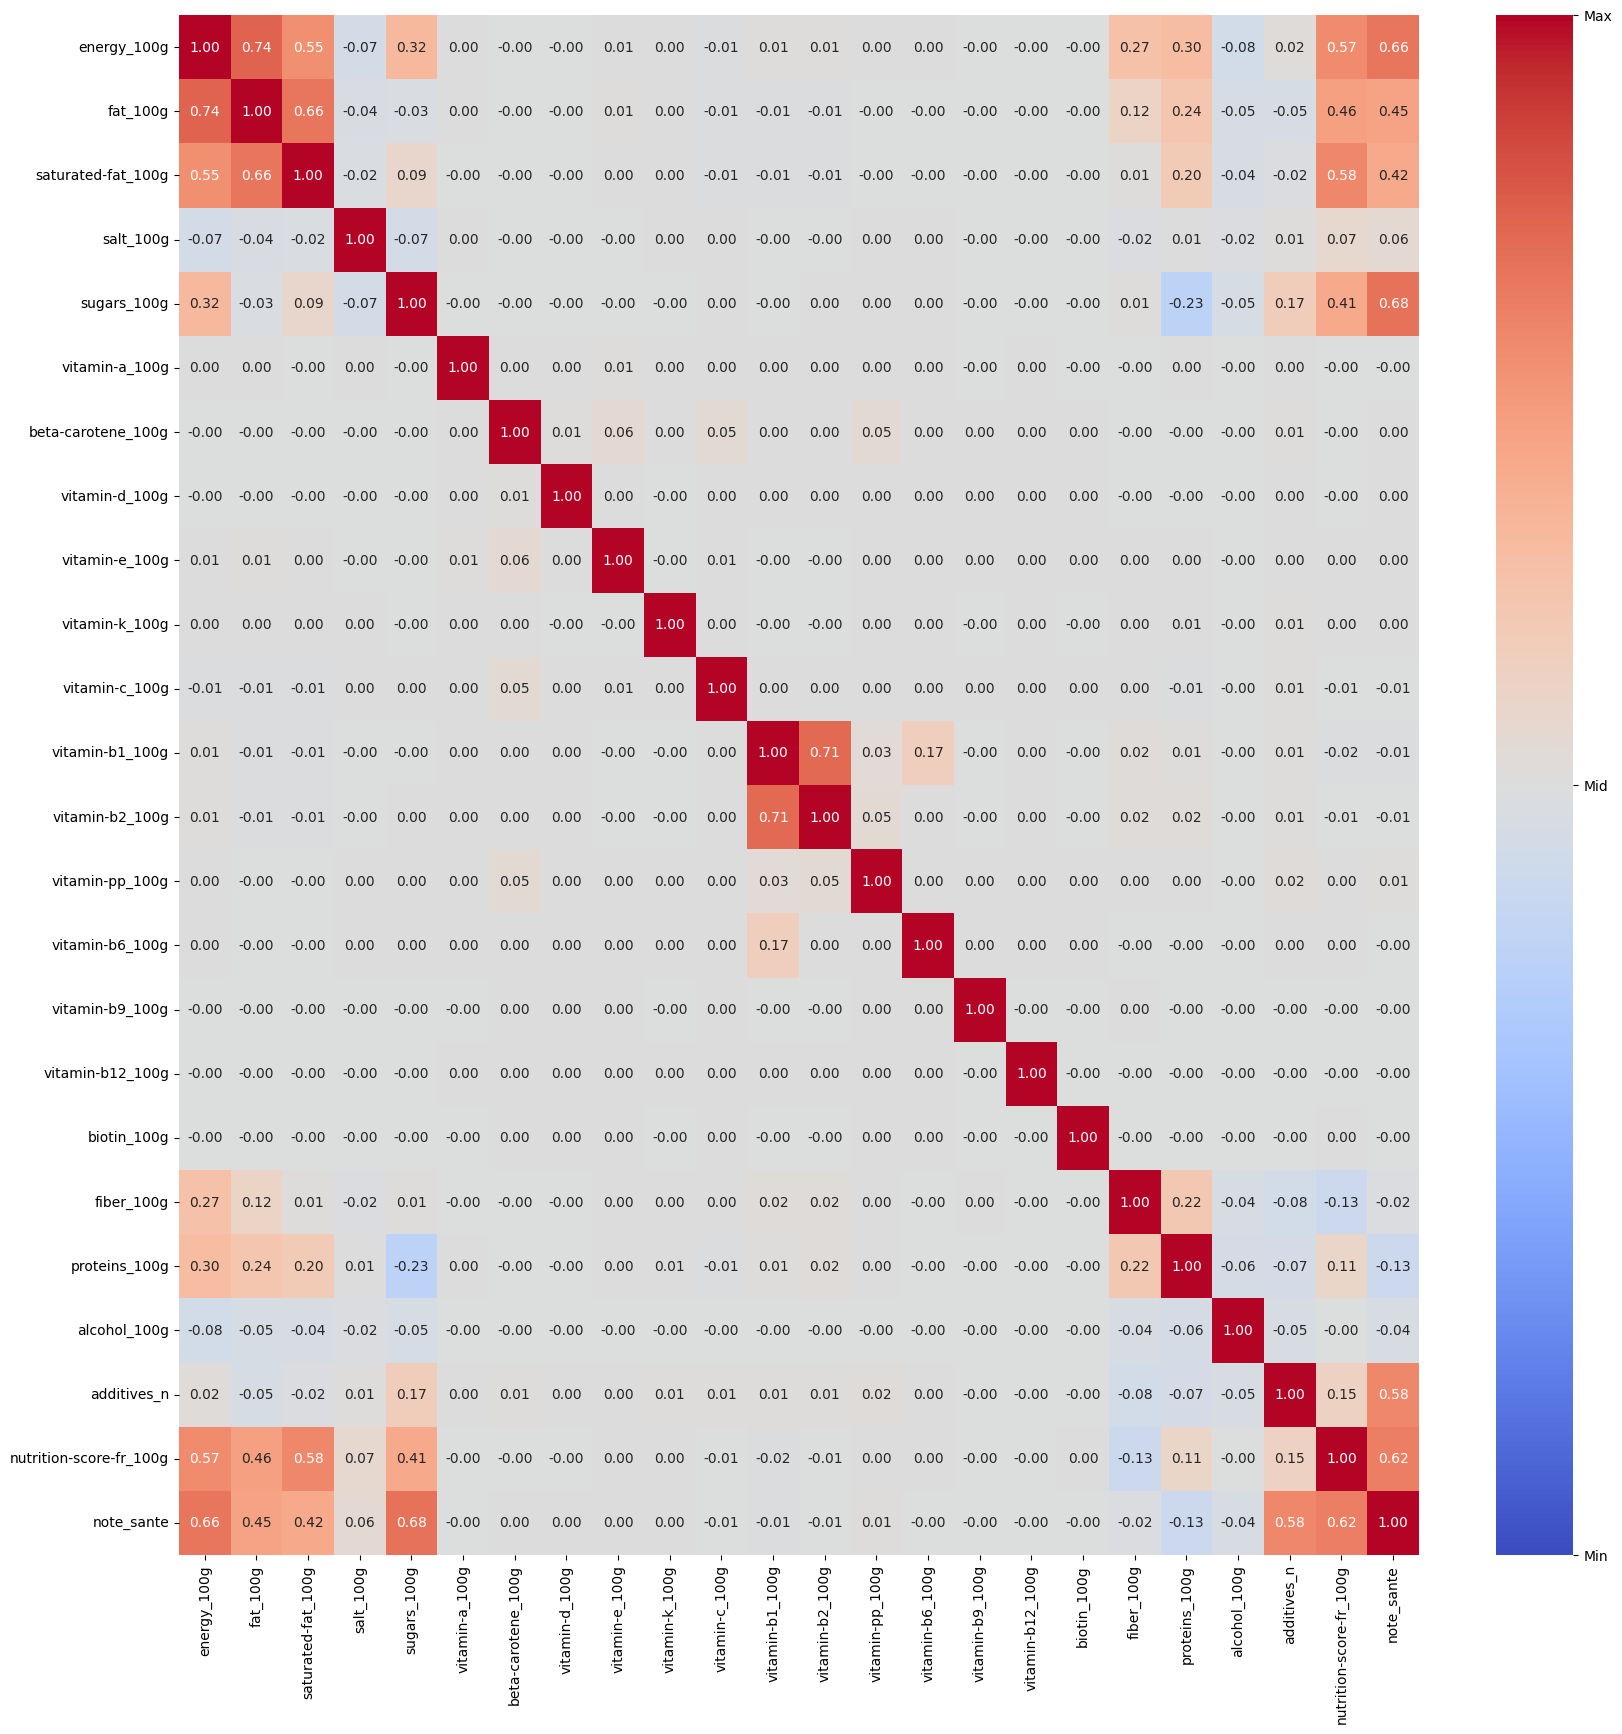

In [40]:
# Matrice de corrélation : 
# Création de df pour la matrice de corrélation : 
df = data.loc[:, ls_col_corr]

# Création de la matrice de corrélation : 
correlation_matrix = df.corr()

# Tracé de la matrice de corrélation
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap="coolwarm", vmin=-1, vmax=1)


# Obtention de l'objet de la légende de couleur
colorbar = heatmap.collections[0].colorbar

# Recentrage de la légende de couleur
colorbar.set_ticks([-1, 0, 1])
colorbar.set_ticklabels(['Min', 'Mid', 'Max'])


# Affichage du graphique
plt.show()

del heatmap, colorbar

Il y a une corrélation entre la note santé et les valeurs : (energy, fat, saturated_fat, salt, sugars, proteins, additives_n) 

Les vitamines, l'alcool et les fibres ont par contre une corrélation quasi-nulle avec la note santé. Ces dernières valeurs ne sont donc pas trèx impactantes sur la note santé.

#### 8.2.2. <a id='toc8_2_2_'></a>[Regression linéaire avec les variables les plus impactantes](#toc0_)
D'après la matrice de corrélation, l'energy, le gras/gras saturés, le sucres, les protéines et les additifs sont les valeurs les plus impactantes sur la note sante. 

Vérifions leur impact par un regression linéaire

In [41]:
# Création des variables :
mask_1 = correlation_matrix['note_sante'] > 0.1
mask_2 = correlation_matrix['note_sante'] < - 0.1

variables_nutrition = list(correlation_matrix.loc[(mask_1) | (mask_2), 'note_sante'].index)
variables_nutrition.remove('note_sante')
variables_nutrition.remove('nutrition-score-fr_100g')

X = data[variables_nutrition].copy()
y = data['note_sante'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Régression linéaire : 
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
score = model.score(X_test, y_test)

In [43]:
# Affichage des résultats : 
print("Coefficients de la régression linéaire entre les valeurs du score santé sélectionnées\net la note santé :")
print('--'*50)
for i in range(len(variables_nutrition)): 
    print("Coefficient linéaire pour",variables_nutrition[i],':', coefficients[i])    
print('--'*50)
print(f"Score de la regression linéaire : {score*100 :.2f} %")

del X, y , coefficients, score, X_test, X_train, y_test, y_train

Coefficients de la régression linéaire entre les valeurs du score santé sélectionnées
et la note santé :
----------------------------------------------------------------------------------------------------
Coefficient linéaire pour energy_100g : 0.0019833222483928077
Coefficient linéaire pour fat_100g : 0.04435041657167006
Coefficient linéaire pour saturated-fat_100g : 0.05057363349329521
Coefficient linéaire pour sugars_100g : 0.08332647382813739
Coefficient linéaire pour proteins_100g : -0.08958169196265324
Coefficient linéaire pour additives_n : 0.8185445291769665
----------------------------------------------------------------------------------------------------
Score de la regression linéaire : 97.87 %


La regression linéaire entre les valeurs impactantes dans le calcul de la note santé et elle-même possède un score de 97,87 % 

--> Ceci est logique, puisque la note santé a été créé à partir d'un calcul linéaire à partir de ces valeurs. 

Les coefficients de la regression linéaire, montre l'impact de chacune de ces valeurs sur la note santé.

#### 8.2.3. <a id='toc8_2_3_'></a>[Analyse de regression de chaque variable par rapport à la note santé](#toc0_)

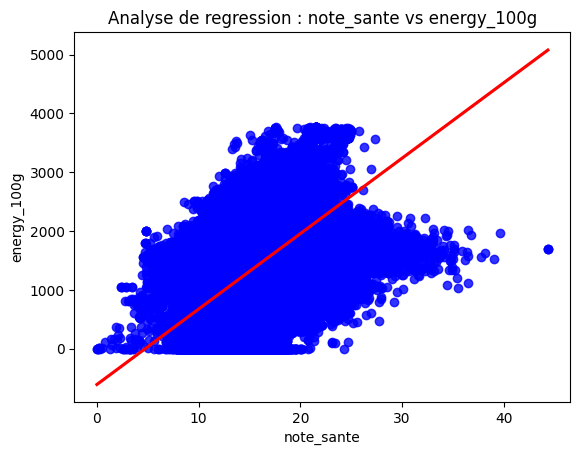

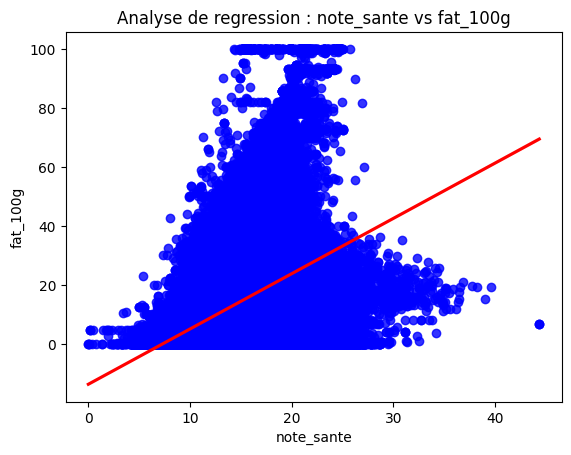

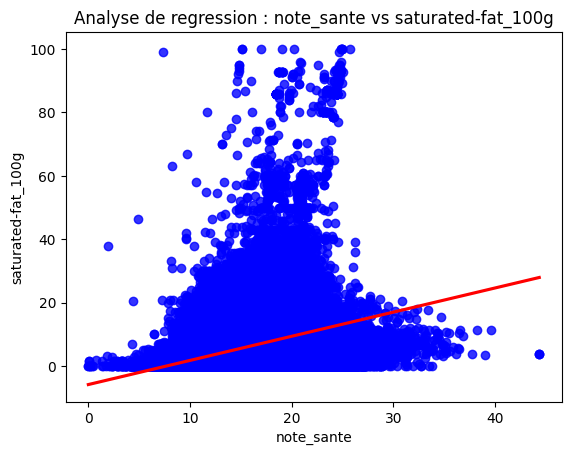

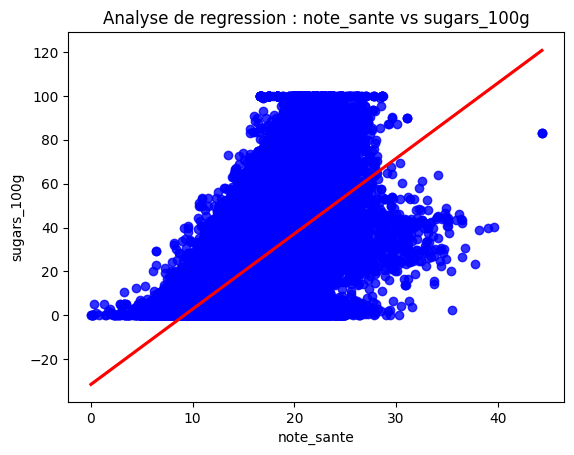

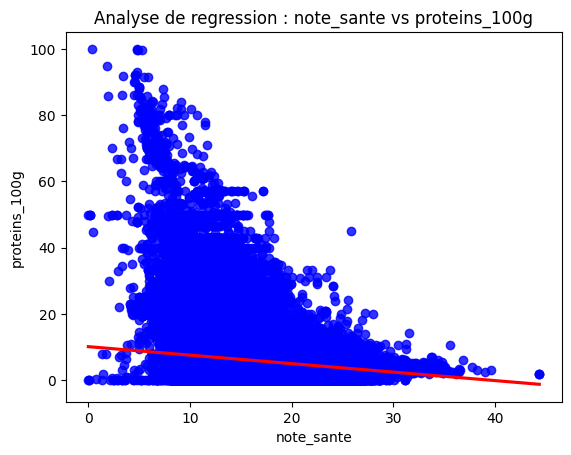

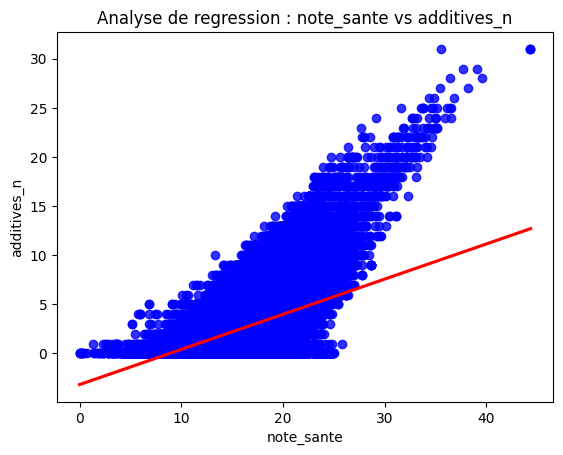

In [44]:
# Visualisation des analyses de regression : 
plt.figure()

for var in variables_nutrition:
    sns.regplot(x=df['note_sante'], y=df[var], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Analyse de regression : note_sante vs {var}')
    plt.show()
    
del variables_nutrition

En regardant l'analyse de regression de chacunes de ces valeurs séparément sur la note santé, cela nous montre la dépendance de la note santé à ces valeurs malgrés la répartition de celles-ci. 

### 8.3. <a id='toc8_3_'></a>[Valeurs environnementales vs note environnementale](#toc0_)
#### 8.3.1. <a id='toc8_3_1_'></a>[Matrice de corrélation sur l'ensemble des variables environnementales](#toc0_)

In [45]:
# Visualisation de la sélection des données : 
# Création de la liste des colonnes pour la matrice : 
ls_col_corr = liste_environnement.copy()
ls_col_corr.append('note_environnement')

# Impression de la liste : 
print("Liste des colonnes sélectionnées pour la matrice de corrélation :\n")
x =''
for i in ls_col_corr: 
    x += i +' | '
print(x)

Liste des colonnes sélectionnées pour la matrice de corrélation :

ingredients_from_palm_oil_n | ingredients_that_may_be_from_palm_oil_n | label_bio | label_vege | packaging_plastique | packaging_metal | packaging_verre | packaging_papier | note_environnement | 


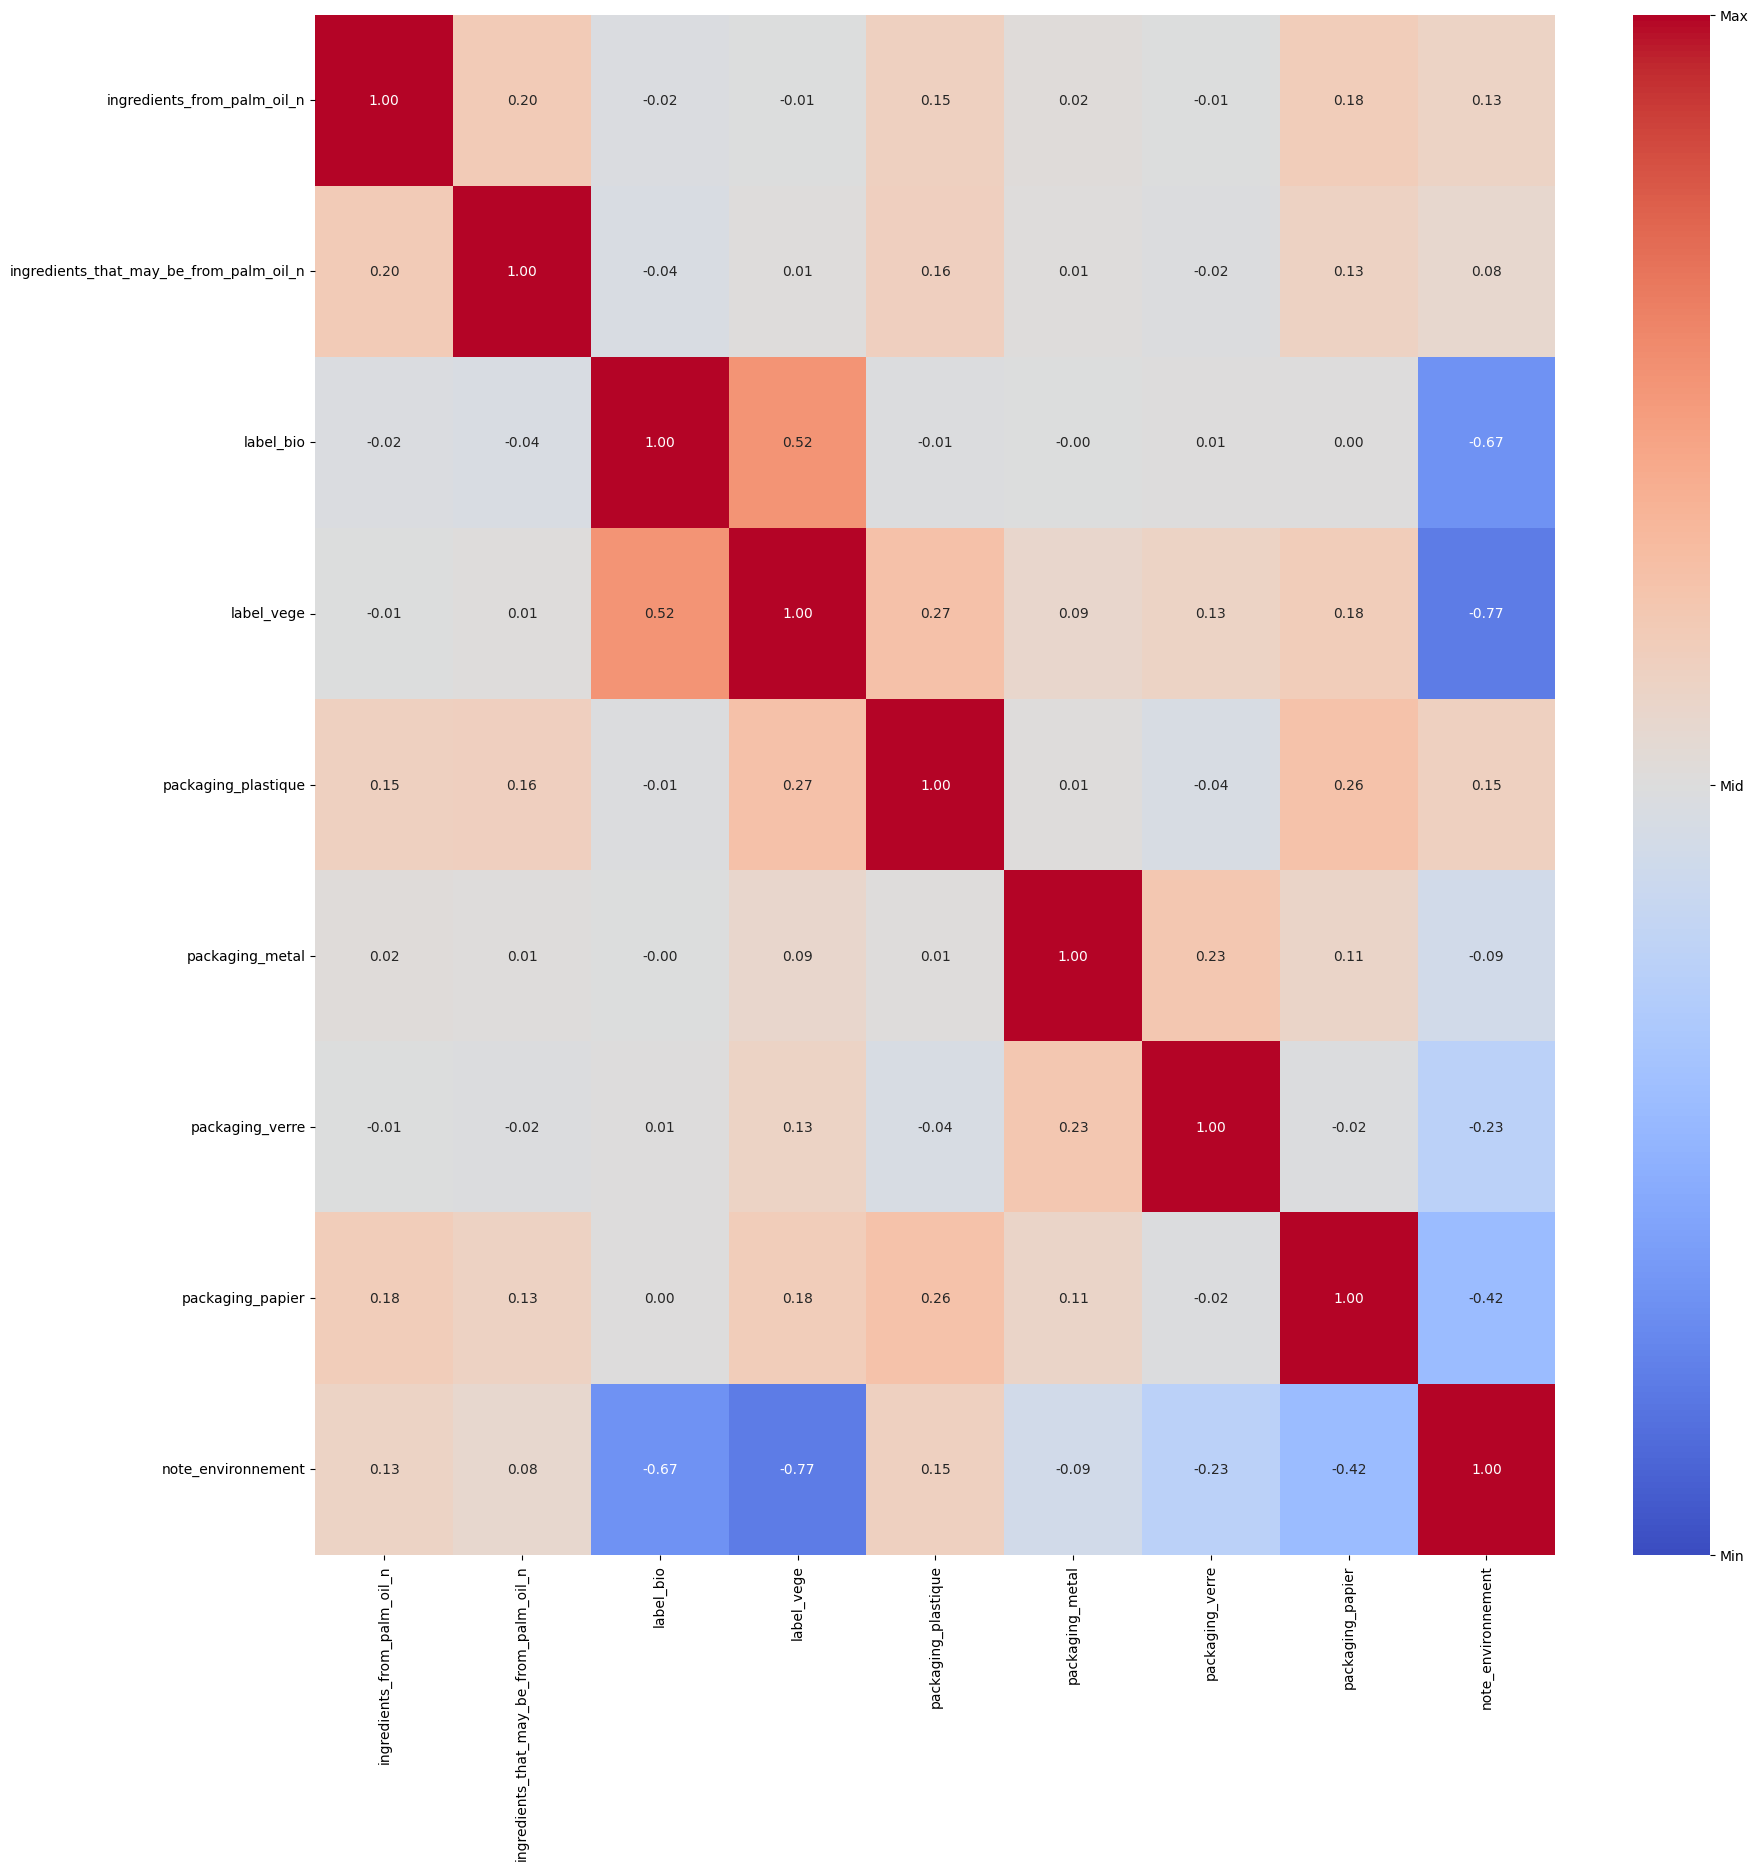

In [46]:
# Matrice de corrélation : 
# Création de df pour la matrice de corrélation : 
df = data.loc[:, ls_col_corr]

# Création de la matrice de corrélation : 
correlation_matrix = df.corr()

# Tracé de la matrice de corrélation
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap="coolwarm", vmin=-1, vmax=1)


# Obtention de l'objet de la légende de couleur
colorbar = heatmap.collections[0].colorbar

# Recentrage de la légende de couleur
colorbar.set_ticks([-1, 0, 1])
colorbar.set_ticklabels(['Min', 'Mid', 'Max'])


# Affichage du graphique
plt.show()

del heatmap, colorbar

Il y a une corrélation plus ou moins importante de chacune des valeurs utilisées dans le calcul de la note environnement. 

Il n'y pas d'indépendance qui ressorte ici. 

#### 8.3.2. <a id='toc8_3_2_'></a>[Regression linéaire avec les valeurs environnementales les plus impactantes](#toc0_)
D'après la matrice de corrélation, l'energy, le gras/gras saturés, le sucres, les protéines et les additifs sont les valeurs nutritionnelles les plus impactantes sur la note nutritionelle. 

Vérifions leur impact par un regression linéaire

In [47]:
# Création des variables :
variables_envirionnementales = list(correlation_matrix['note_environnement'].index)
variables_envirionnementales.remove('note_environnement')

X = data[variables_envirionnementales].copy()
y = data['note_environnement'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Régression linéaire : 
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_ 
score = model.score(X_test, y_test)

In [49]:
# Affichage des résultats : 
print("Coefficients de la régressions linéaires entre les valeurs nutritionnelles sélectionnées\net la note environnement :")
print('--'*50)
for i in range(len(variables_envirionnementales)): 
    print("Coefficient linéaire pour",variables_envirionnementales[i],':', coefficients[i])    
print('--'*50)
print(f"Score de la régression linéaire : {score*100 : .2f} %")
del X, y, coefficients, score, X_test, X_train, y_test, y_train

Coefficients de la régressions linéaires entre les valeurs nutritionnelles sélectionnées
et la note environnement :
----------------------------------------------------------------------------------------------------
Coefficient linéaire pour ingredients_from_palm_oil_n : 5.304295833328529
Coefficient linéaire pour ingredients_that_may_be_from_palm_oil_n : 0.8729208938246051
Coefficient linéaire pour label_bio : -8.16165392305615
Coefficient linéaire pour label_vege : -8.534913928445805
Coefficient linéaire pour packaging_plastique : 6.107925276679562
Coefficient linéaire pour packaging_metal : 1.3910957551270444
Coefficient linéaire pour packaging_verre : -4.605713625879117
Coefficient linéaire pour packaging_papier : -9.298044684925955
----------------------------------------------------------------------------------------------------
Score de la régression linéaire :  99.14 %


La regression linéaire entre les valeurs impactantes dans le calcul de la note environnement et elle-même possède un score de 99,14 % 

--> Ceci est logique, puisque la note environnement a été créé à partir d'un calcul linéaire à partir de ces valeurs. 

Les coefficients de la regression linéaire, montre l'impact de chacune de ces valeurs sur la note environnement.

#### 8.3.3. <a id='toc8_3_3_'></a>[Analyse de regression de chaque variable par rapport à la note environnement](#toc0_)

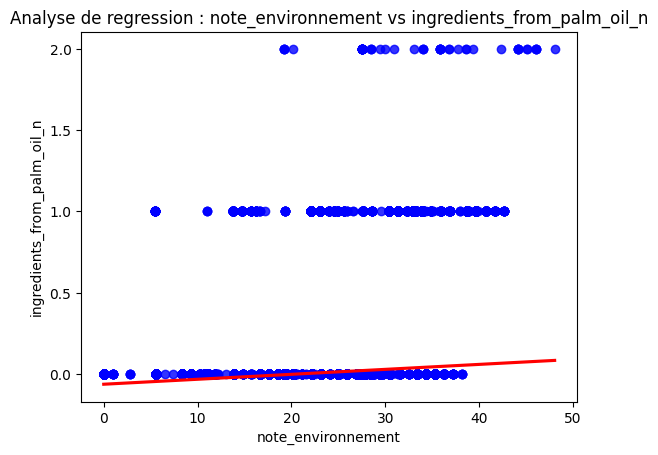

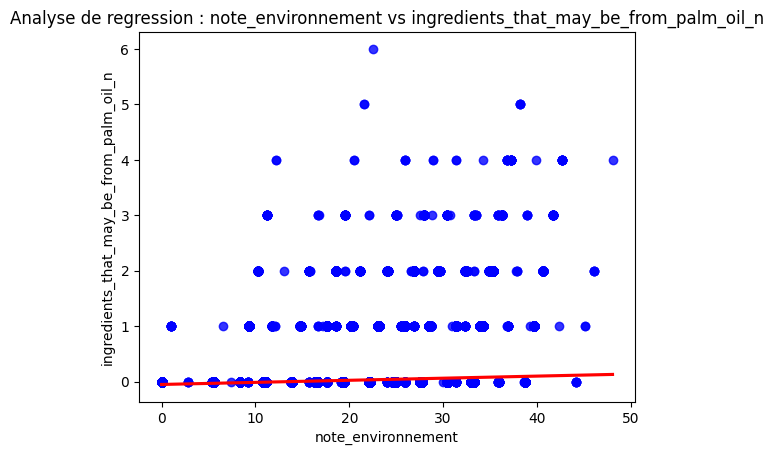

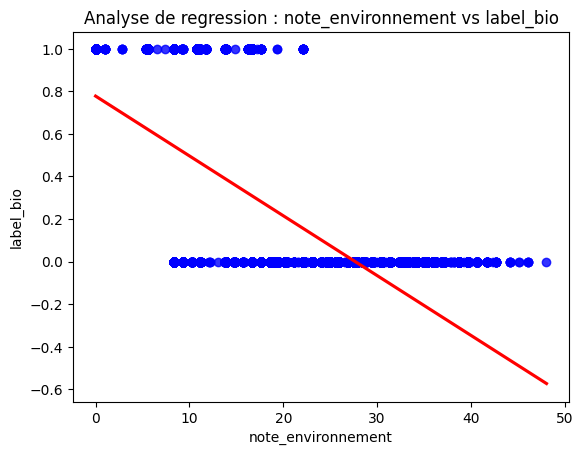

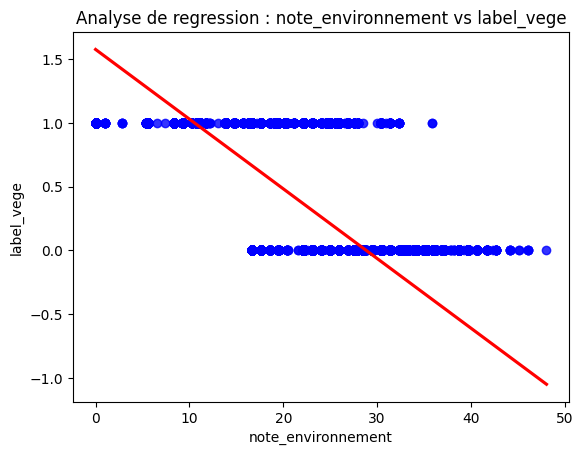

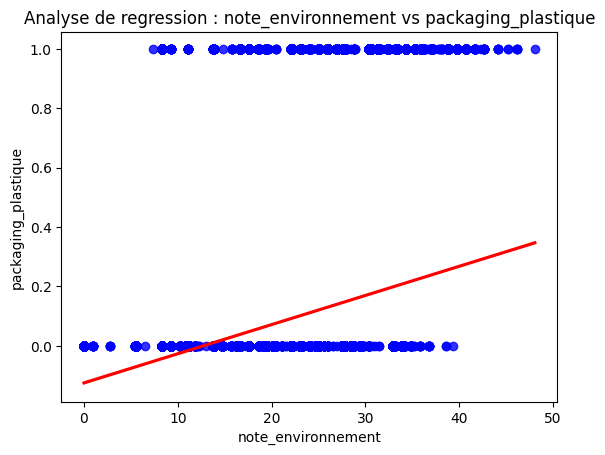

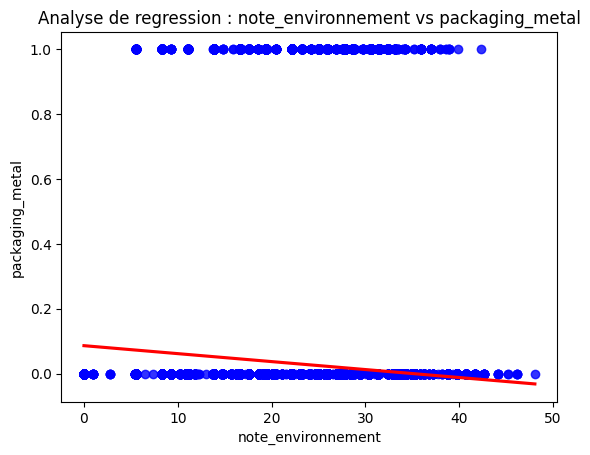

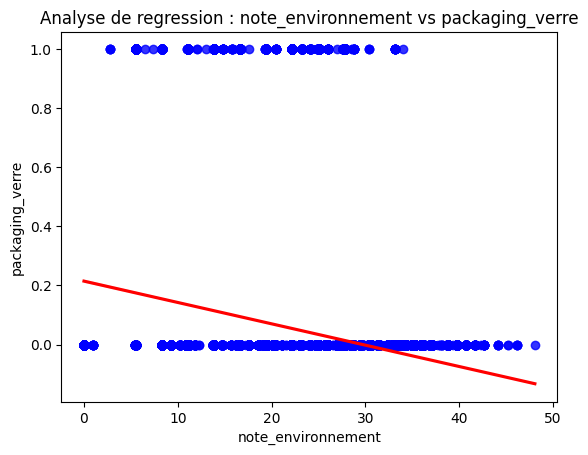

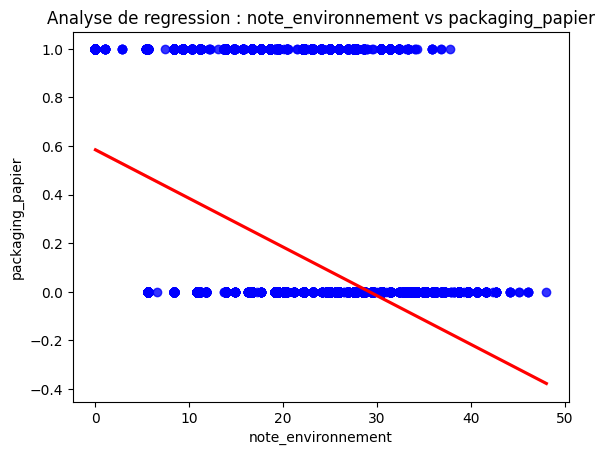

In [50]:
# Visualisation des analyses de regression : 
plt.figure()

for var in variables_envirionnementales:
    sns.regplot(x=df['note_environnement'], y=df[var], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Analyse de regression : note_environnement vs {var}')
    plt.show()
    
del variables_envirionnementales

En regardant l'analyse de regression de chacunes de ces valeurs séparément sur la note environnement, cela nous montre la dépendance de la note environnement à ces valeurs malgrés la répartition de celles-ci. 

### 8.4. <a id='toc8_4_'></a>[Impact de la catégorie du produit sur les notes](#toc0_)
Observation des différents impacts sur les note santé, environnementale, totale et nutriscore de la catégorie des produits

#### 8.4.1. <a id='toc8_4_1_'></a>[Estimation de l'impact par régression linéaire](#toc0_)

In [51]:
# Création des données : 

df = data.loc[data['pnns_groups_1'] != 'unknown']
X = df[['pnns_groups_1', 'pnns_groups_2']]
y_sante = df['note_sante']
y_environnement = df['note_environnement']
y_total = df['note_tot']
y_nutriscore = df['nutrition-score-fr_100g']

# Ecodage des valeurs catégorielles : 
X_encoded = pd.get_dummies(X)

# Création des listes 
list_pnns_1_et_2 = list(X_encoded.columns)

list_pnns_1 = [x for x in list_pnns_1_et_2 if 'pnns_groups_1' in x]
for i in range(len(list_pnns_1)):
    list_pnns_1[i] = list_pnns_1[i][14:]

list_pnns_2 = [x for x in list_pnns_1_et_2 if 'pnns_groups_2' in x]
for i in range(len(list_pnns_2)):
    list_pnns_2[i] = list_pnns_2[i][14:]

In [52]:
# Création des models de régression linéaire : 
model_sante = LinearRegression()
model_sante.fit(X_encoded, y_sante)

model_environnement = LinearRegression()
model_environnement.fit(X_encoded, y_environnement)

model_total = LinearRegression()
model_total.fit(X_encoded, y_total)

model_nutriscore = LinearRegression()
model_nutriscore.fit(X_encoded, y_nutriscore)

LinearRegression()

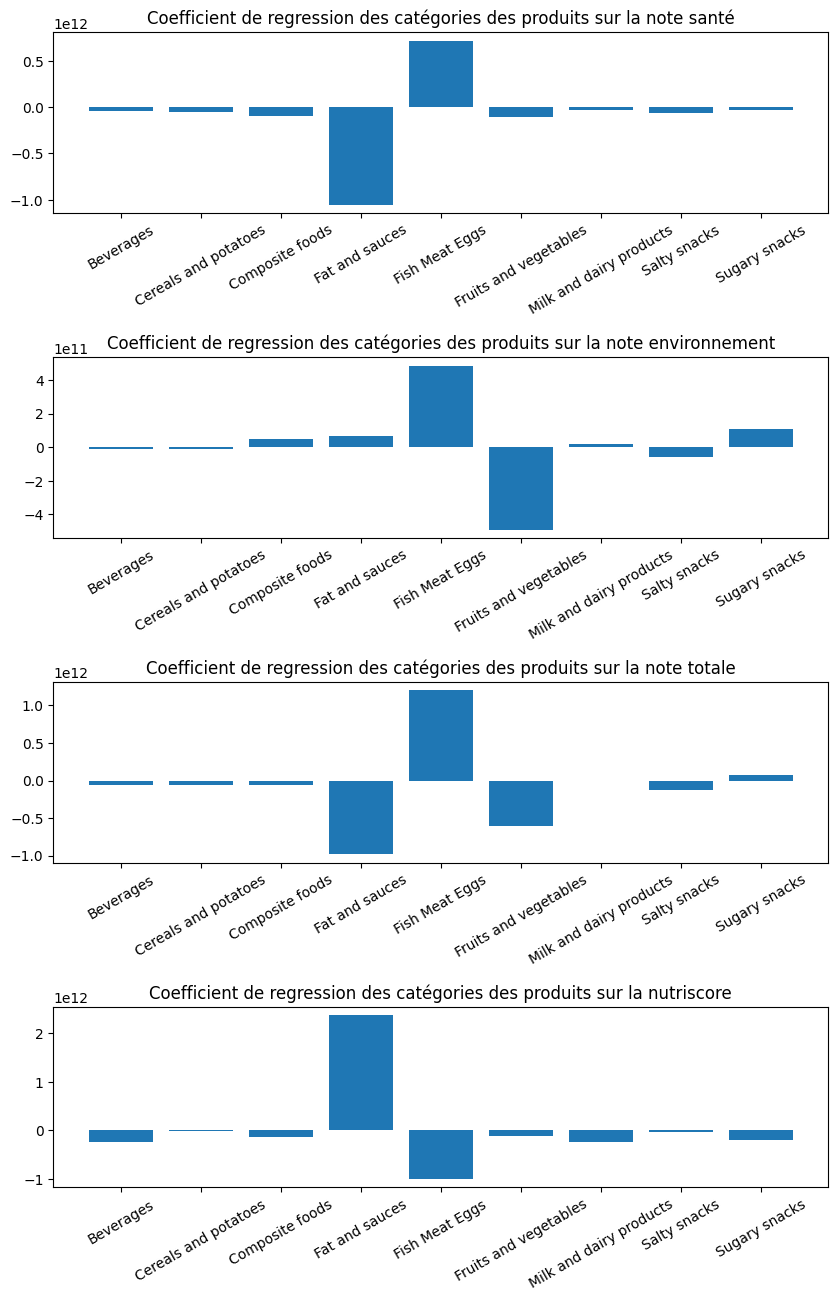

In [53]:
# Visualisation de l'impact des catéogries pnns_1 sur les notes : 

coefficients_sante = model_sante.coef_[:len(list_pnns_1)]
coefficients_environnement = model_environnement.coef_[:len(list_pnns_1)]
coefficients_total = model_total.coef_[:len(list_pnns_1)]
coefficients_nutriscore = model_nutriscore.coef_[:len(list_pnns_1)]

plt.figure(figsize=(10,15))

# Graph1 - impact note sante : 
plt.subplot(4,1,1)
plt.bar(list_pnns_1, coefficients_sante)
plt.title('Coefficient de regression des catégories des produits sur la note santé')
plt.xticks(rotation=30)

# Graph2 - impact note environnement : 
plt.subplot(4,1,2)
plt.bar(list_pnns_1, coefficients_environnement)
plt.title('Coefficient de regression des catégories des produits sur la note environnement')
plt.xticks(rotation=30)

# Graph3 - impact note totale : 
plt.subplot(4,1,3)
plt.bar(list_pnns_1, coefficients_total)
plt.title('Coefficient de regression des catégories des produits sur la note totale')
plt.xticks(rotation=30)

# Graph2 - nutriscore : 
plt.subplot(4,1,4)
plt.bar(list_pnns_1, coefficients_nutriscore)
plt.title('Coefficient de regression des catégories des produits sur la nutriscore')
plt.xticks(rotation=30)

plt.subplots_adjust(hspace=0.8)

plt.show()


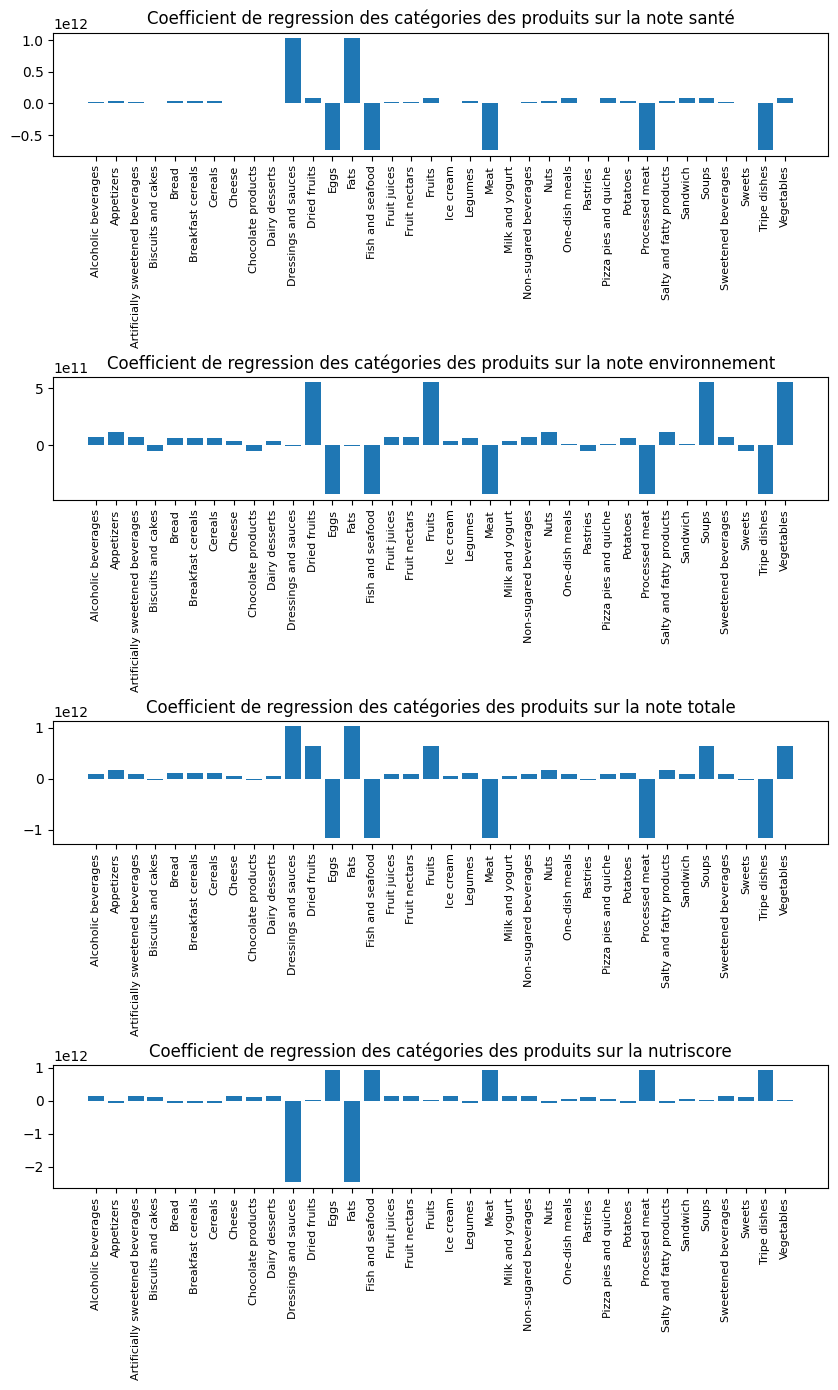

In [54]:
# Visualisation de l'impact des catéogries pnns_2 sur les notes : 

coefficients_sante = model_sante.coef_[len(list_pnns_1):]
coefficients_environnement = model_environnement.coef_[len(list_pnns_1):]
coefficients_total = model_total.coef_[len(list_pnns_1):]
coefficients_nutriscore = model_nutriscore.coef_[len(list_pnns_1):]


plt.figure(figsize=(10,15))

# Graph1 - impact note sante : 
plt.subplot(4,1,1)
plt.bar(list_pnns_2, coefficients_sante)
plt.title('Coefficient de regression des catégories des produits sur la note santé')
plt.xticks(rotation=90, fontsize=8)

# Graph2 - impact note environnement : 
plt.subplot(4,1,2)
plt.bar(list_pnns_2, coefficients_environnement)
plt.title('Coefficient de regression des catégories des produits sur la note environnement')
plt.xticks(rotation=90, fontsize=8)

# Graph3 - impact note totale : 
plt.subplot(4,1,3)
plt.bar(list_pnns_2, coefficients_total)
plt.title('Coefficient de regression des catégories des produits sur la note totale')
plt.xticks(rotation=90, fontsize=8)


# Graph2 - nutriscore : 
plt.subplot(4,1,4)
plt.bar(list_pnns_2, coefficients_nutriscore)
plt.title('Coefficient de regression des catégories des produits sur la nutriscore')
plt.xticks(rotation=90, fontsize=8)


plt.subplots_adjust(hspace=1.8)

plt.show()

del coefficients_environnement, coefficients_nutriscore, coefficients_sante, coefficients_total


#### 8.4.2. <a id='toc8_4_2_'></a>[Impact des catégories selon les notes calculées](#toc0_)

In [55]:
# Création des données pour les l'impact des pnns_groups_1 :  
df_means = df.groupby('pnns_groups_1')[['note_sante', 'note_environnement', 'note_tot', 
                                        'nutrition-score-fr_100g']].mean()

# Noramlisation entre 0 et 1 des valeurs de df_means : 
scaler = MinMaxScaler()
df_means = pd.DataFrame(scaler.fit_transform(df_means), index=df_means.index, columns=df_means.columns)

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_13937/324459218.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,8), ha='left', fontsize=8)


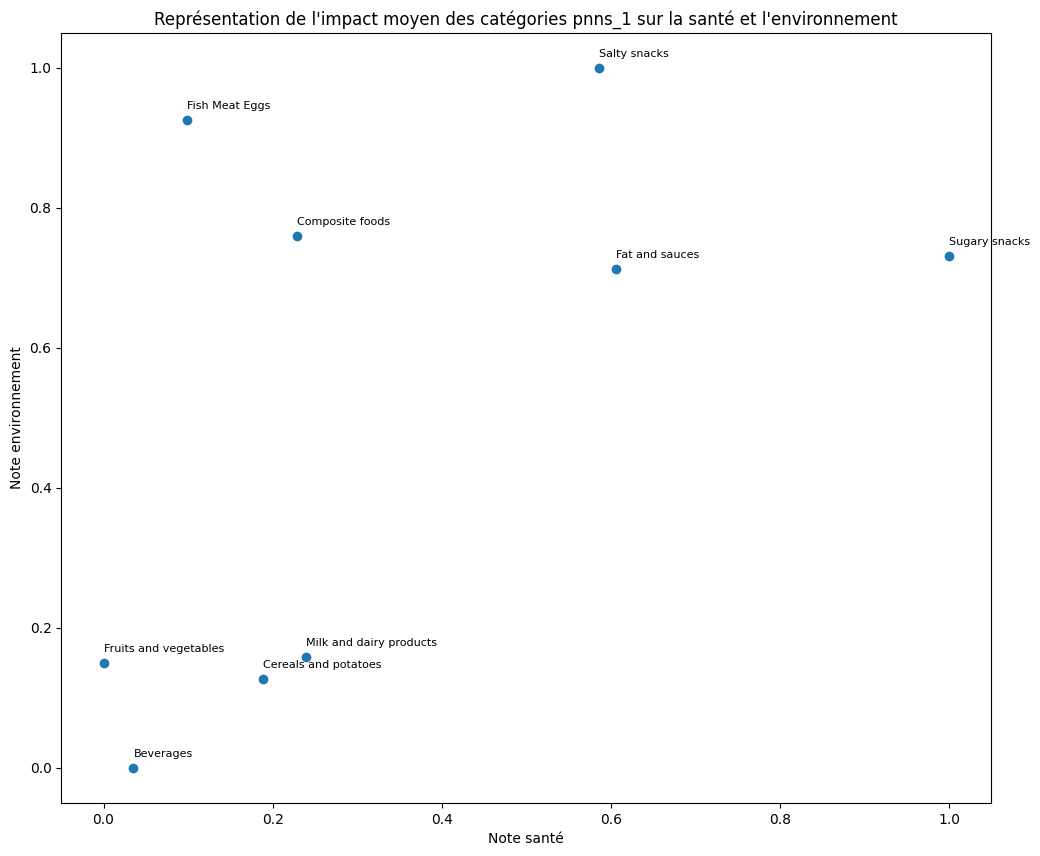

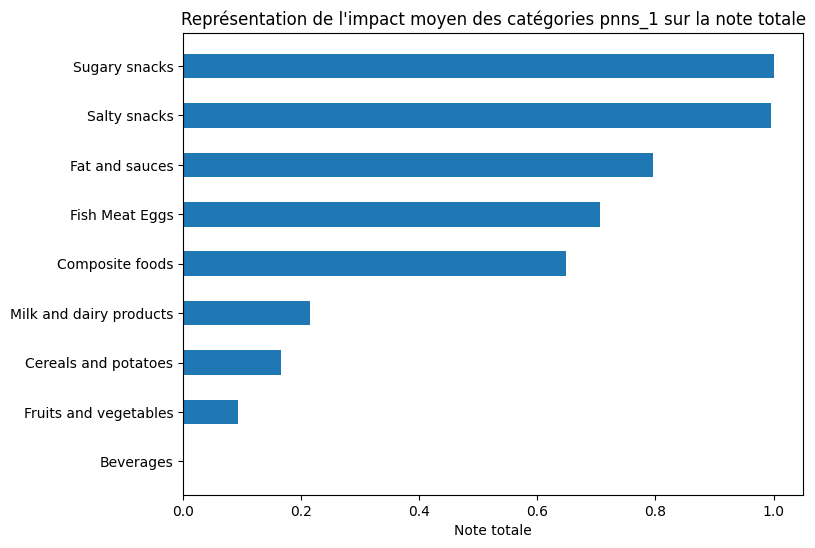

In [56]:
# Visualisation :

# Création des données :
x = df_means['note_sante']
y = df_means['note_environnement']
z = df_means['note_tot'].sort_values()
z_labels = list(z.index)
labels = list(df_means.index)

# Création du graphique_1 | impact sur la note santé et environnement : 
plt.figure(figsize=(12,10))

plt.scatter(x,y)

for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,8), ha='left', fontsize=8)

plt.xlabel('Note santé')
plt.ylabel('Note environnement')
plt.title("Représentation de l'impact moyen des catégories pnns_1 sur la santé et l'environnement")

plt.show()

# Création du graphique_2 | impact sur la note totale : 
plt.figure(figsize=(8,6))

plt.barh(z_labels, z, height=0.5)
plt.title("Représentation de l'impact moyen des catégories pnns_1 sur la note totale")
plt.xlabel('Note totale')

plt.show()

In [57]:
# ANOVA des pnns_1 sur les notes santé et environnement : 

# Création d'un DataFrame : 
df_2 = data.loc[: ,['pnns_groups_1', 'note_sante', 'note_environnement']]


# ANOVA pour note_sante : 
model_sante = ols('note_sante ~ pnns_groups_1', data=df_2).fit()
anova_table_sante = sm.stats.anova_lm(model_sante)

# Récupération de F, p-value et Eta carré pour note_sante : 
f_value_sante = anova_table_sante['F'].iloc[0]
p_value_sante = anova_table_sante['PR(>F)'].iloc[0]
eta_squared_sante = anova_table_sante['sum_sq'].iloc[0] / anova_table_sante['sum_sq'].sum()

# ANOVA pour note_environnement : 
model_env = ols('note_environnement ~ pnns_groups_1', data=data).fit()
anova_table_env = sm.stats.anova_lm(model_env)

# Récupéation F, p-value et Eta carré pour note_environnement : 
f_value_env = anova_table_env['F'].iloc[0]
p_value_env = anova_table_env['PR(>F)'].iloc[0]
eta_squared_env = anova_table_env['sum_sq'].iloc[0] / anova_table_env['sum_sq'].sum()

print("Résultat de l'ANOVA entre les pnns_1 et les notes santés et environnement :")
print('--'*50)
print("Résultats pour note_sante:")
print("F_value :", f_value_sante)
print("p_value :", p_value_sante)
print("Eta carré :", eta_squared_sante, '\n')

print("Résultats pour note_environnement:")
print("F_value :", f_value_env)
print("p_value :", p_value_env)
print("Eta carré :", eta_squared_env)

Résultat de l'ANOVA entre les pnns_1 et les notes santés et environnement :
----------------------------------------------------------------------------------------------------
Résultats pour note_sante:
F_value : 5190.585445977032
p_value : 0.0
Eta carré : 0.1335442084112827 

Résultats pour note_environnement:
F_value : 11459.343775401856
p_value : 0.0
Eta carré : 0.2538809790493895


Dans les deux cas : 
   - F_value possède une grande valeur et p_value est nul : les catégories de produits pnns_1 ont bien un impact sur les notes santé et environnement. 
   
Les pnns_1 peuvent expliquer 13,35 % de la variation de la note santé. 

Les pnns_1 peuvent expliquer 25,38 % de la variation de la note environnement. 
    
    -> les catégories pnns_1 ont donc un impact sur les notes santé et environnement mais n'explique pas l'ensemble de la variation de celles-ci.  

In [58]:
# écart-type et étendue de la note santé au sein des pnns_groups_1 : 

ecart_type = data.groupby('pnns_groups_1')['note_sante'].std()

etendue = data.groupby('pnns_groups_1')['note_sante'].apply(lambda x: np.max(x) - np.min(x))

# Affichage des résultats
print("Écart-type de la note santé par pnns_groups_1 :\n", ecart_type)
print("\nÉtendue de la note santé par pnns_groups_1 :\n", etendue)

Écart-type de la note santé par pnns_groups_1 :
 pnns_groups_1
Beverages                  2.140753
Cereals and potatoes       2.334856
Composite foods            2.899237
Fat and sauces             4.544333
Fish Meat Eggs             2.509247
Fruits and vegetables      2.253092
Milk and dairy products    2.519964
Salty snacks               2.056683
Sugary snacks              2.833875
unknown                    3.848438
Name: note_sante, dtype: float64

Étendue de la note santé par pnns_groups_1 :
 pnns_groups_1
Beverages                  21.255281
Cereals and potatoes       22.725760
Composite foods            18.827469
Fat and sauces             18.788328
Fish Meat Eggs             27.189684
Fruits and vegetables      19.775075
Milk and dairy products    19.884733
Salty snacks               20.854338
Sugary snacks              40.328303
unknown                    39.600921
Name: note_sante, dtype: float64


In [59]:
# écart-type et étendue de la note environnement au sein des pnns_groups_1 : 

ecart_type = data.groupby('pnns_groups_1')['note_environnement'].std()

etendue = data.groupby('pnns_groups_1')['note_environnement'].apply(lambda x: np.max(x) - np.min(x))

# Affichage des résultats
print("Écart-type de la note environnement par pnns_groups_1 :\n", ecart_type)
print("\nÉtendue de la note environnement par pnns_groups_1 :\n", etendue)

Écart-type de la note environnement par pnns_groups_1 :
 pnns_groups_1
Beverages                  5.389651
Cereals and potatoes       6.266781
Composite foods            6.435633
Fat and sauces             6.595033
Fish Meat Eggs             6.047581
Fruits and vegetables      5.281477
Milk and dairy products    5.417422
Salty snacks               5.478213
Sugary snacks              7.029344
unknown                    3.910638
Name: note_environnement, dtype: float64

Étendue de la note environnement par pnns_groups_1 :
 pnns_groups_1
Beverages                  30.416667
Cereals and potatoes       35.833333
Composite foods            41.666667
Fat and sauces             41.666667
Fish Meat Eggs             40.694444
Fruits and vegetables      31.388889
Milk and dairy products    32.361111
Salty snacks               38.611111
Sugary snacks              48.055556
unknown                    46.111111
Name: note_environnement, dtype: float64


In [60]:
# Création des données pour les l'impact des pnns_groups_2 :  
df_means = df.groupby('pnns_groups_2')[['note_sante', 'note_environnement', 'note_tot', 
                                        'nutrition-score-fr_100g']].mean()

# Noramlisation entre 0 et 1 des valeurs de df_means : 
scaler = MinMaxScaler()
df_means = pd.DataFrame(scaler.fit_transform(df_means), index=df_means.index, columns=df_means.columns)

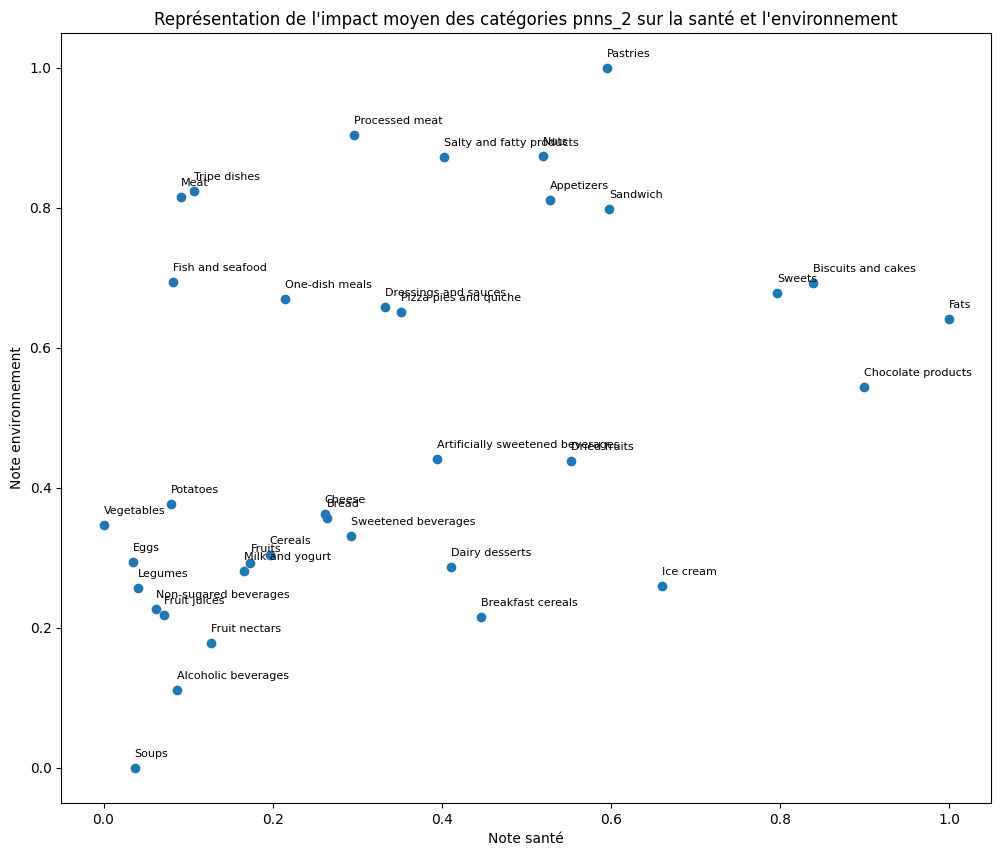

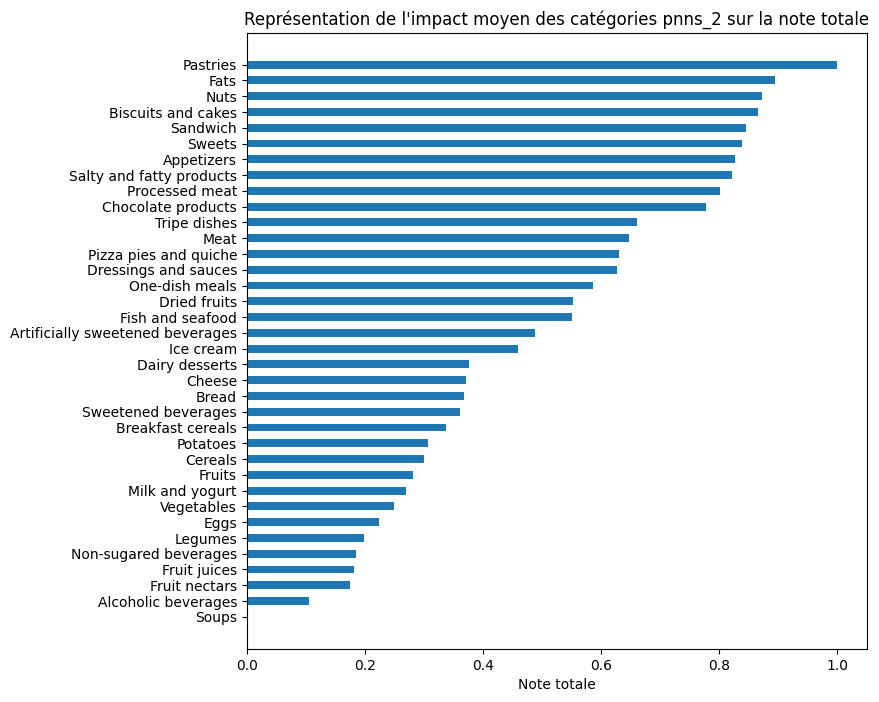

In [61]:
# Visualisation :

# Création des données :
x = df_means['note_sante']
y = df_means['note_environnement']
z = df_means['note_tot'].sort_values()
z_labels = list(z.index)
labels = list(df_means.index)

# Création du graphique : 
plt.figure(figsize=(12,10))

plt.scatter(x,y)

for i, label in enumerate(labels):
    plt.annotate(label, (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0,8), ha='left', fontsize=8)

plt.xlabel('Note santé')
plt.ylabel('Note environnement')
plt.title("Représentation de l'impact moyen des catégories pnns_2 sur la santé et l'environnement")

plt.show()

# Création du graphique_2 | impact sur la note totale : 
plt.figure(figsize=(8,8))

plt.barh(z_labels, z, height=0.5)
plt.title("Représentation de l'impact moyen des catégories pnns_2 sur la note totale")
plt.xlabel('Note totale')

plt.show()

del df_means, df, x, y, z, z_labels, labels

In [62]:
# ANOVA des pnns_2 sur les notes santé et environnement : 

# Création d'un DataFrame : 
df_2 = data.loc[: ,['pnns_groups_2', 'note_sante', 'note_environnement']]


# ANOVA pour note_sante : 
model_sante = ols('note_sante ~ pnns_groups_2', data=df_2).fit()
anova_table_sante = sm.stats.anova_lm(model_sante)

# Récupération de F, p-value et Eta carré pour note_sante : 
f_value_sante = anova_table_sante['F'].iloc[0]
p_value_sante = anova_table_sante['PR(>F)'].iloc[0]
eta_squared_sante = anova_table_sante['sum_sq'].iloc[0] / anova_table_sante['sum_sq'].sum()

# ANOVA pour note_environnement : 
model_env = ols('note_environnement ~ pnns_groups_2', data=data).fit()
anova_table_env = sm.stats.anova_lm(model_env)

# Récupéation F, p-value et Eta carré pour note_environnement : 
f_value_env = anova_table_env['F'].iloc[0]
p_value_env = anova_table_env['PR(>F)'].iloc[0]
eta_squared_env = anova_table_env['sum_sq'].iloc[0] / anova_table_env['sum_sq'].sum()

print("Résultat de l'ANOVA entre les pnns_2 et les notes santés et environnement :")
print('--'*50)
print("Résultats pour note_sante:")
print("F_value :", f_value_sante)
print("p_value :", p_value_sante)
print("Eta carré :", eta_squared_sante, '\n')

print("Résultats pour note_environnement:")
print("F_value :", f_value_env)
print("p_value :", p_value_env)
print("Eta carré :", eta_squared_env)

del df_2, model_sante, anova_table_sante, f_value_sante, p_value_sante, eta_squared_sante
del model_env, anova_table_env, f_value_env, p_value_env, eta_squared_env

Résultat de l'ANOVA entre les pnns_2 et les notes santés et environnement :
----------------------------------------------------------------------------------------------------
Résultats pour note_sante:
F_value : 1697.355728725672
p_value : 0.0
Eta carré : 0.16779022869876709 

Résultats pour note_environnement:
F_value : 3228.9695856322537
p_value : 0.0
Eta carré : 0.27722300195559163


Dans les deux cas : 
   - F_value possède une grande valeur et p_value est nul : les catégories de produits pnns_2 ont bien un impact sur les notes santé et environnement. 
   
Les pnns_2 peuvent expliquer 16,78 % de la variation de la note santé. 

Les pnns_2 peuvent expliquer 27,72 % de la variation de la note environnement. 
    
    -> les catégories pnns_2 ont donc un impact sur les notes santé et environnement mais n'explique pas l'ensemble de la variation de celles-ci.  

In [63]:
# écart-type et étendue de la note santé au sein des pnns_groups_2 : 

ecart_type = data.groupby('pnns_groups_2')['note_sante'].std()

etendue = data.groupby('pnns_groups_2')['note_sante'].apply(lambda x: np.max(x) - np.min(x))

# Affichage des résultats
print("Écart-type de la note santé par pnns_groups_2 :\n", ecart_type)
print("\nÉtendue de la note santé par pnns_groups_2 :\n", etendue)

Écart-type de la note santé par pnns_groups_2 :
 pnns_groups_2
Alcoholic beverages                 1.068022
Appetizers                          2.174818
Artificially sweetened beverages    2.394116
Biscuits and cakes                  2.681288
Bread                               1.791457
Breakfast cereals                   2.358221
Cereals                             1.884959
Cheese                              1.587362
Chocolate products                  2.241738
Dairy desserts                      2.767702
Dressings and sauces                3.392909
Dried fruits                        1.726264
Eggs                                0.798438
Fats                                1.626718
Fish and seafood                    2.104785
Fruit juices                        0.646923
Fruit nectars                       1.010751
Fruits                              2.151424
Ice cream                           2.948239
Legumes                             1.988773
Meat                                2

In [64]:
# écart-type et étendue de la note environnement au sein des pnns_groups_2 : 

ecart_type = data.groupby('pnns_groups_2')['note_environnement'].std()

etendue = data.groupby('pnns_groups_2')['note_environnement'].apply(lambda x: np.max(x) - np.min(x))

# Affichage des résultats
print("Écart-type de la note environnement par pnns_groups_2 :\n", ecart_type)
print("\nÉtendue de la note environnement par pnns_groups_2 :\n", etendue)

Écart-type de la note environnement par pnns_groups_2 :
 pnns_groups_2
Alcoholic beverages                 3.296656
Appetizers                          5.813815
Artificially sweetened beverages    3.705282
Biscuits and cakes                  6.900793
Bread                               6.124350
Breakfast cereals                   5.930681
Cereals                             6.524600
Cheese                              5.322603
Chocolate products                  7.006692
Dairy desserts                      5.103157
Dressings and sauces                5.668113
Dried fruits                        4.880309
Eggs                                9.248533
Fats                                8.289120
Fish and seafood                    5.376550
Fruit juices                        5.978874
Fruit nectars                       6.482998
Fruits                              5.008831
Ice cream                           6.438460
Legumes                             5.237031
Meat                         

## 9. <a id='toc9_'></a>[Mise en place d'un idée d'application](#toc0_)
### 9.1. <a id='toc9_1_'></a>[Prédiction des catégories unknown](#toc0_)
Remplacement de tous les catégories unknown à l'aide d'un modèle RandomForest pour le regroupement de l'ensemble des produits en catégories connues
#### 9.1.1. <a id='toc9_1_1_'></a>[Prédiction des pnns_groups_1](#toc0_)

In [65]:
# Création des variables : 

# Variables sélectionnées pour la détermination des clusters : 
variables = ['additives_n', 'ingredients_that_may_be_from_palm_oil_n', 'label_bio', 'label_vege',
             'packaging_metal', 'packaging_verre', 'packaging_papier', 'energy_100g', 'fat_100g',
             'saturated-fat_100g', 'salt_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g']

# Création des data avec et sans ctégories de produits connues : 
data_known = data[data['pnns_groups_1'] != 'unknown']
data_unknown = data[data['pnns_groups_1'] == 'unknown']

X_known = data_known[variables].values
X_unknown = data_unknown[variables].values

# Noramlisation des données : 
scaler = StandardScaler()
X_known_scaled = scaler.fit_transform(X_known)
X_unknown_scaled = scaler.transform(X_unknown)

# Variable pour le Random Forest : 
known_categories = data_known['pnns_groups_1']

ls = [x for x in range(60, 70)]
param_grid = {'n_estimators': ls}

# Création du modèle de classification (Random Forest) : 
rfc = RandomForestClassifier(random_state=0)

# Création des données de train et de test :  
X_train, X_test, y_train, y_test = train_test_split(X_known_scaled, known_categories, test_size=0.2, random_state=0)


In [66]:
# Recherche du meilleur paramètre n_estimators pour le RandomForest : 

# Utilisation de GridSearchCV pour trouver le meilleur n_estimators :
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

# Affichage des résultats de la recherche : 
print("Meilleur n_estimators :", best_n_estimators)
print("Score de validation croisée moyen :", grid_search.best_score_)

Meilleur n_estimators : 61
Score de validation croisée moyen : 0.9668614110488922


In [67]:
# Prédiction des catégories pnns_groups_1 des produits inconnus : 

# Création du mondèle RandomForest à partir du meilleur n_estimators : 
rfc = RandomForestClassifier(n_estimators=best_n_estimators, random_state=0)
rfc.fit(X_train, y_train)

# Prédire les catégories des produits non catégorisés
predicted_categories = rfc.predict(X_unknown_scaled)

In [68]:
# Remplacement des pnns_groups_1 par les catégories prédites : 
data_unknown.loc[:, 'pnns_groups_1'] = predicted_categories

#### 9.1.2. <a id='toc9_1_2_'></a>[Prédiction des pnns_groups_2](#toc0_)

In [69]:
# Création des variables : 

# Variable pour le Random Forest : 
known_categories = data_known['pnns_groups_2']

ls = [x for x in range(60, 70)]
param_grid = {'n_estimators': ls}

# Création du modèle de classification (Random Forest) : 
rfc = RandomForestClassifier(random_state=0)

# Création des données de train et de test :  
X_train, X_test, y_train, y_test = train_test_split(X_known_scaled, known_categories, test_size=0.2, random_state=0)


In [70]:
# Recherche du meilleur paramètre n_estimators pour le RandomForest : 

# Utilisation de GridSearchCV pour trouver le meilleur n_estimators :
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

# Affichage des résultats de la recherche : 
print("Meilleur n_estimators :", best_n_estimators)
print("Score de validation croisée moyen :", grid_search.best_score_)

Meilleur n_estimators : 69
Score de validation croisée moyen : 0.9180043055626085


In [71]:
# Prédiction des catégories pnns_groups_2 des produits inconnus : 

# Création du mondèle RandomForest à partir du meilleur n_estimators : 
rfc = RandomForestClassifier(n_estimators=best_n_estimators, random_state=0)
rfc.fit(X_train, y_train)

# Prédire les catégories des produits non catégorisés
predicted_categories = rfc.predict(X_unknown_scaled)

In [72]:
# Remplacement des pnns_groups_1 par les catégories prédites : 
data_unknown.loc[:, 'pnns_groups_2'] = predicted_categories

#### 9.1.3. <a id='toc9_1_3_'></a>[Regroupement dans data](#toc0_)

In [73]:
# Remplacement des catégories inconnues par les catégories connues dans data : 
index = data_unknown.index

data.loc[index, ['pnns_groups_1', 'pnns_groups_2']] = data_unknown[['pnns_groups_1', 'pnns_groups_2']]

del variables, data_known, data_unknown, X_known, X_unknown, X_known_scaled, X_unknown_scaled, known_categories
del ls, param_grid, scaler, rfc, X_train, X_test, y_train, y_test, predicted_categories

### 9.2. <a id='toc9_2_'></a>[Test de la fonction better_product](#toc0_)

In [74]:
# Variables de test : 
code_1 = '0000000004530'
code_2 = '0000000016124'
code_3 = '0000000018630'
code_4 = '0000000018395'
code_5 = 'mauvais code'
code_6 = None

In [75]:
fct_projet_3.better_product(data=data, selected_product_code=code_1)

----------------------------------------

Vous avez choisi le produit : Banana Chips Sweetened (Whole) 

Score santé du produit : D
Score environnement du produit : C 

----------------------------------------

Proposition de produits similaires :

Le produit Banana Chips sera le plus similaire avec un meilleur impact sur votre santé.
Score santé : D 

Le produit Organic Sweetened Banana Chips sera le plus similaire avec un meilleur impact sur l'environnement.
Score environnement : B 

----------------------------------------

Proposition du meilleur produit de la catégorie Sugary snacks | Biscuits and cakes :

Le produit Organic Original Oaten Biscuits sera le produit avec le meilleur impact global de cette catégorie.
Score global : A
Score santé : D
Score environnement : A


In [76]:
fct_projet_3.better_product(data=data, selected_product_code=code_2)

----------------------------------------

Vous avez choisi le produit : Organic Muesli 

Score santé du produit : D
Score environnement du produit : B 

----------------------------------------

Proposition de produits similaires :

Le produit Organic Muesli, Cinnamon sera le plus similaire avec un meilleur impact sur votre santé.
Score santé : D 

Le produit Muesli sera le plus similaire avec un meilleur impact sur l'environnement.
Score environnement : A 

----------------------------------------

Proposition du meilleur produit de la catégorie Cereals and potatoes | Breakfast cereals :

Le produit Flocons d'avoine bio sera le produit avec le meilleur impact global de cette catégorie.
Score global : A
Score santé : B
Score environnement : A


In [77]:
fct_projet_3.better_product(data=data, selected_product_code=code_3)

----------------------------------------

Vous avez choisi le produit : Organic Coconut Chips 

Score santé du produit : E
Score environnement du produit : B 

----------------------------------------

Proposition de produits similaires :

Le produit coconut sera le plus similaire avec un meilleur impact sur votre santé.
Score santé : B 

Le produit Compote Pommes-Châtaignes Bio sera le plus similaire avec un meilleur impact sur l'environnement.
Score environnement : A 

----------------------------------------

Proposition du meilleur produit de la catégorie Fruits and vegetables | Fruits :

Le produit Purée De Fruits Pomme-pêche Banane Bio Casino sera le produit avec le meilleur impact global de cette catégorie.
Score global : A
Score santé : B
Score environnement : A


In [78]:
fct_projet_3.better_product(data=data, selected_product_code=code_4)

----------------------------------------

Vous avez choisi le produit : Roasted Salted Black Pepper Cashews 

Score santé du produit : D
Score environnement du produit : C 

----------------------------------------

Proposition de produits similaires :

Le produit Roasted Cashews sera le plus similaire avec un meilleur impact sur votre santé.
Score santé : D 

Le produit Organic Cashews sera le plus similaire avec un meilleur impact sur l'environnement.
Score environnement : B 

----------------------------------------

Proposition du meilleur produit de la catégorie Salty snacks | Nuts :

Le produit Crème de chataignes bio sera le produit avec le meilleur impact global de cette catégorie.
Score global : A
Score santé : D
Score environnement : A


Comme nous pouvons le constater, certains produits proposés ne sont pas exactement des produits similaires au produit sélectionné (cf : Organic Coconut Chips vs Compote Pommes-Châtaignes Bio)

Cela est dû en partie au rapprochement des produits par la méthode fuzzywuzzy ainsi qu'aux erreur des catégories dues au classement par la modèle RandomForest (malgré un score élevé de ce dernier).

### 9.3. <a id='toc9_3_'></a>[Test des erreurs de la fonction](#toc0_)

In [79]:
fct_projet_3.better_product(data=data, selected_product_code=code_5)

Le produit sélectionné ne fait pas partie de la base de donnée.


In [80]:
fct_projet_3.better_product(data=data, selected_product_code=code_6)

ValueError: selected_product_code est vide.